In [25]:
import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

from scipy import signal
import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

p2_nodes
[0.1] after_full_step
0.13234894 -0.18735321 0.31970215
(81, 161)


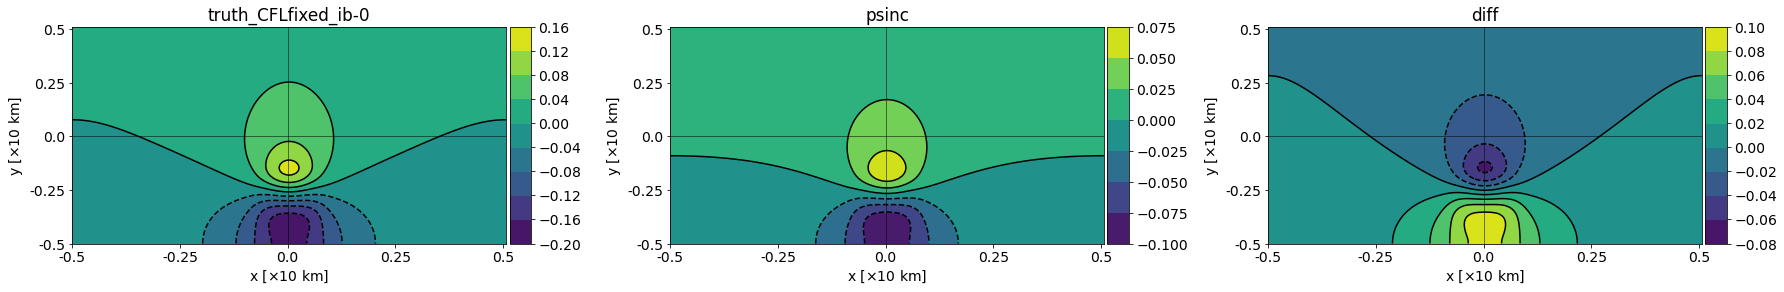

In [26]:
swe = False

attribute = 'p2_nodes'
# attribute = 'rhoX'
et = 1.0
print(attribute)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx, Ny = 160, 80
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

l_typ = 'TIME'
times = [0.1]
# l_typ = 'WINDOW_STEP'
# times = [0]
tags = tc.get_tag_dict()
tag = tags[9]

print(times, tag)
# if len(times) < 1:
#     tag = 'ic' if times[0] == 0.0 else tags[9]

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=True)[1:]
    rho = tc.get_ensemble(times, 1, 'rho', sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=True)[1:]
    if swe:
        ens = ens[:,0,:]
#     else:
#         ens *= 100.0
    if len(times) > 1:
        ens = ens[1] - ens[0]
    else:
        ens = ens[0]
    ens = ens.T #/ rho.T
#     ens = ens.T
#     
    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_imbal_half_CFLfixed_ib-0'
sfx_ref = 'psinc_noib_CFLfixed'

sfx_ref = 'psinc_debug_CFLfixed'
# sfx1 = 'debug_imbal_CFLfixed_ib-0'
sfx1 = 'truth_CFLfixed_ib-0'
# sfx1 = 'comp_imbal_noib_CFLfixed'

l2, a1 = get_ens(tc, sfx1, diff, 'rho', swe=False)
l2, a2 = get_ens(tc, sfx1, diff, attribute, swe=False)
la = 'Euler vortex'

# times = [0]
# tag = tags[9]
_, ll_ref = get_ens(tc, sfx_ref, diff, attribute, swe=False)
aa = a2
print(aa.max(), aa.min(), aa.max() - aa.min())
lvls = np.arange(-0.0065,0.0025,0.0005) * 10.0
    
print(aa.shape)
if sfx1 == 'artigen' or sfx1=='psinc':
    np.save('ic_%s_%s.npy' %(attribute,sfx1), aa.T)
    
diff = ll_ref - aa
ll = [[aa, sfx1], [ll_ref, 'psinc'], [diff, 'diff']]
pl_lst = ll

pl = pt.plotter(pl_lst,ncols=3,figsize=(25,5),sharey=False)
x_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = [-0.5,-0.25,0.0,0.25,0.5]
x_loc = np.linspace(0,Nx-1,5)
y_loc = np.linspace(0,Ny-1,5)
if swe: 
    x_label = r'x [km]'
    y_label = r'y [km]'
else:
    x_label = r'x [$\times 10$ km]'
    y_label = r'y [$\times 10$ km]'

axvline = 79.5
axhline = 39.5

pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
_ = pl.plot(aspect='equal',method='contour')

lbl = 'swe' if swe else 'euler'
# pl.save_fig('./output/euler_imprint')

p2_nodes
[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.  ] after_full_step
0.13234894 -0.18735321 0.31970215
(81, 161)


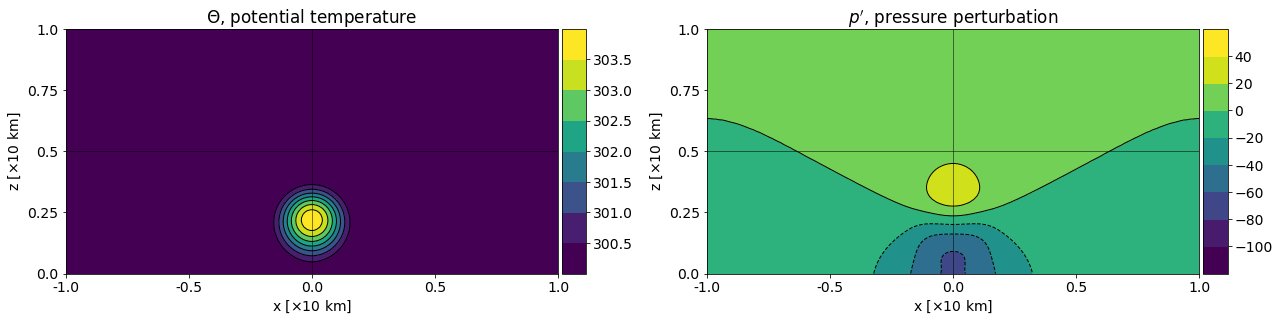

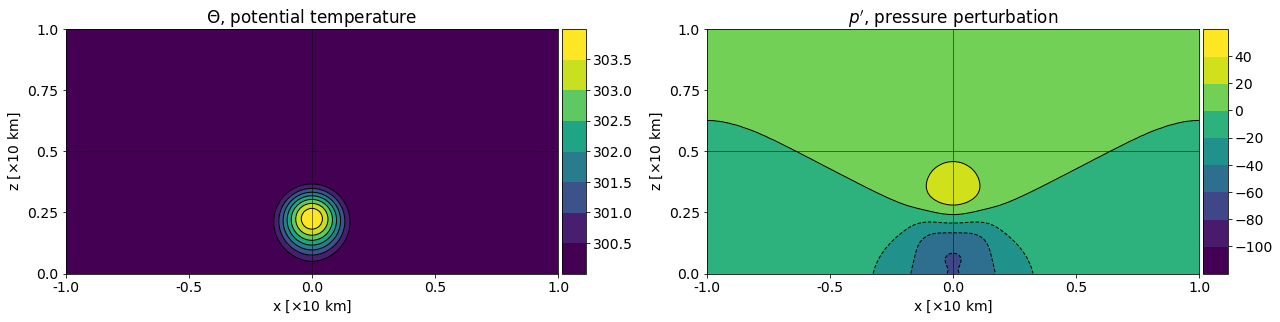

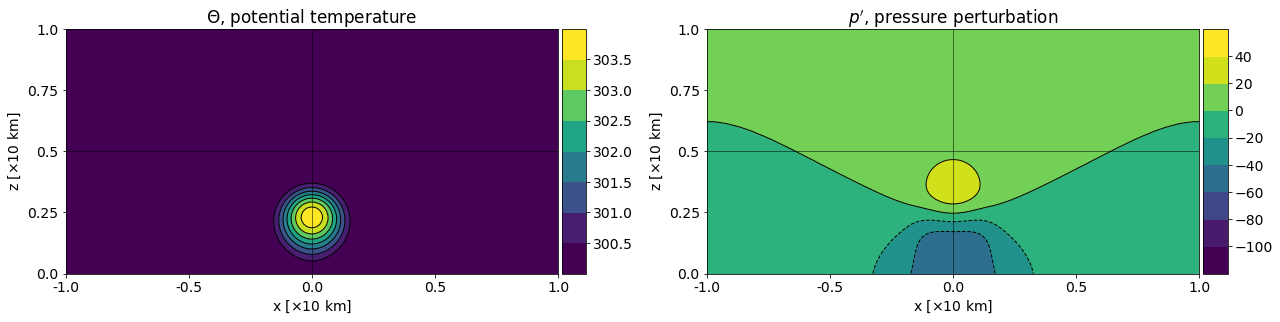

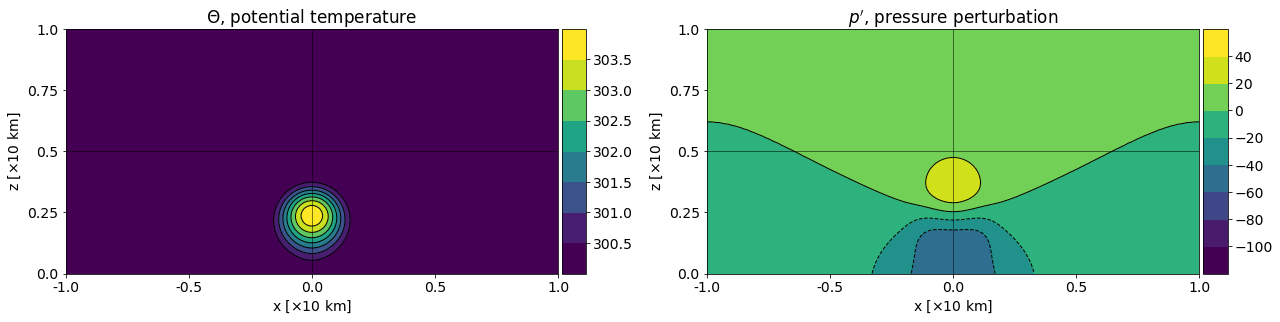

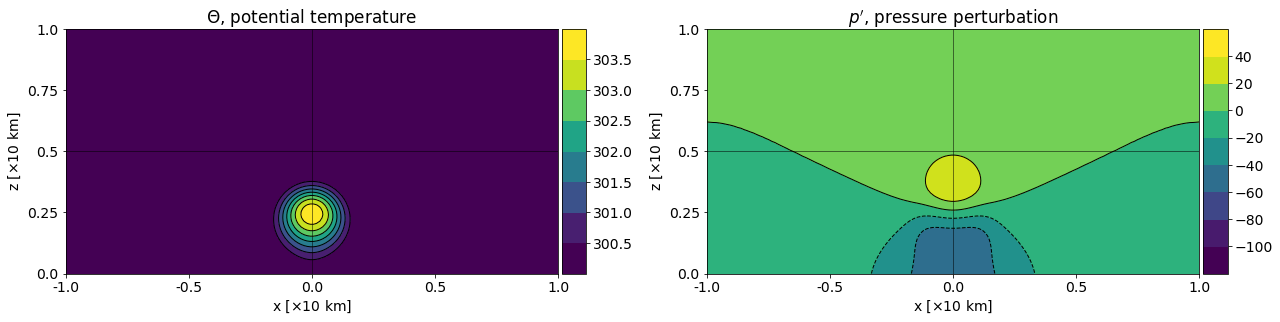

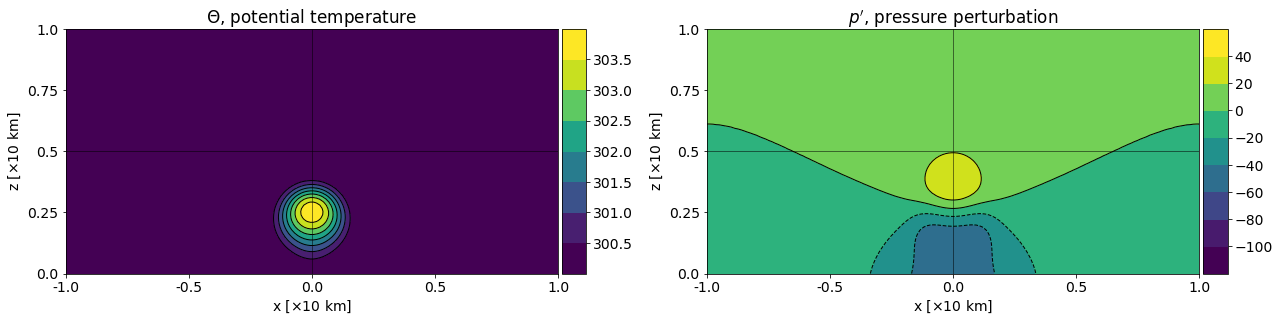

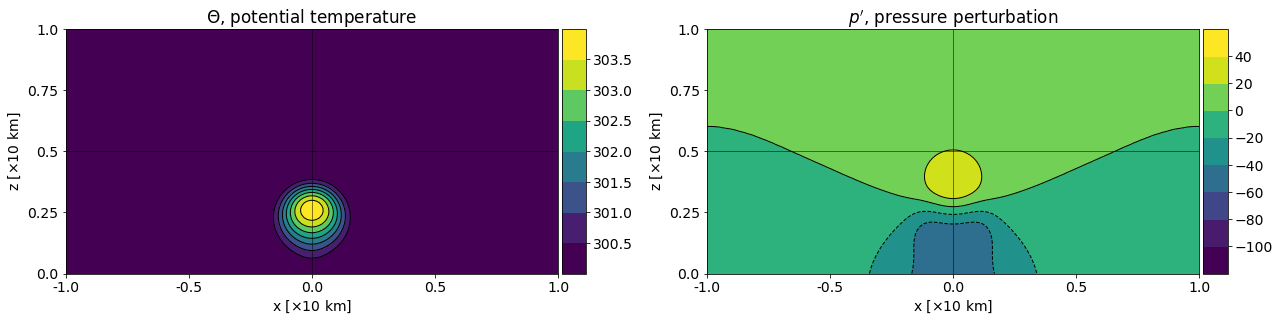

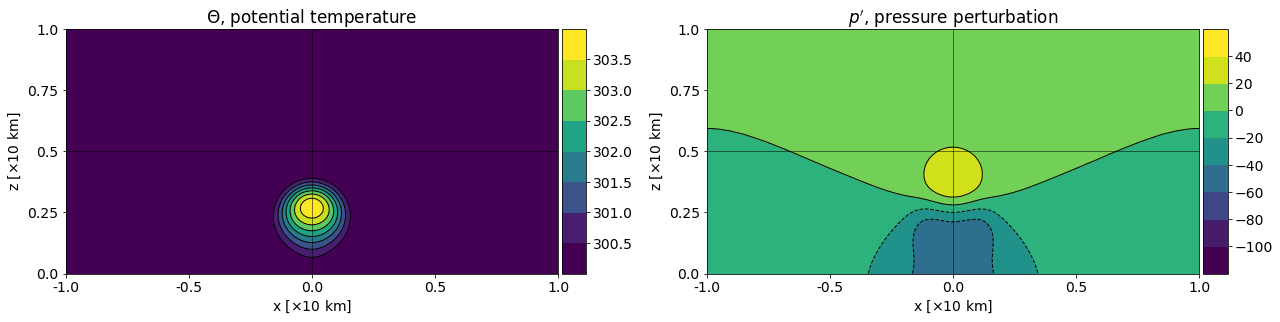

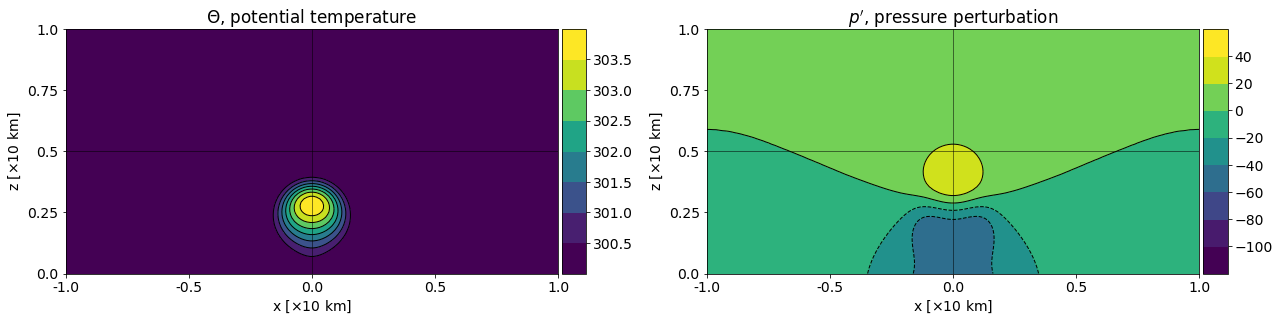

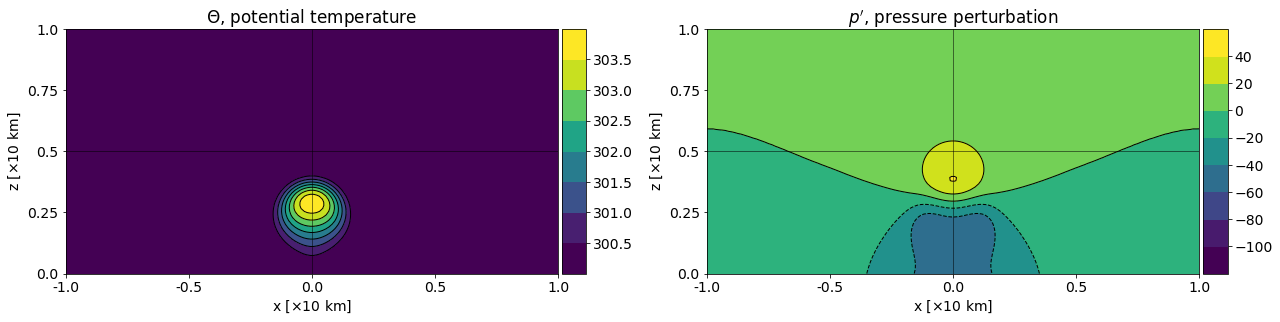

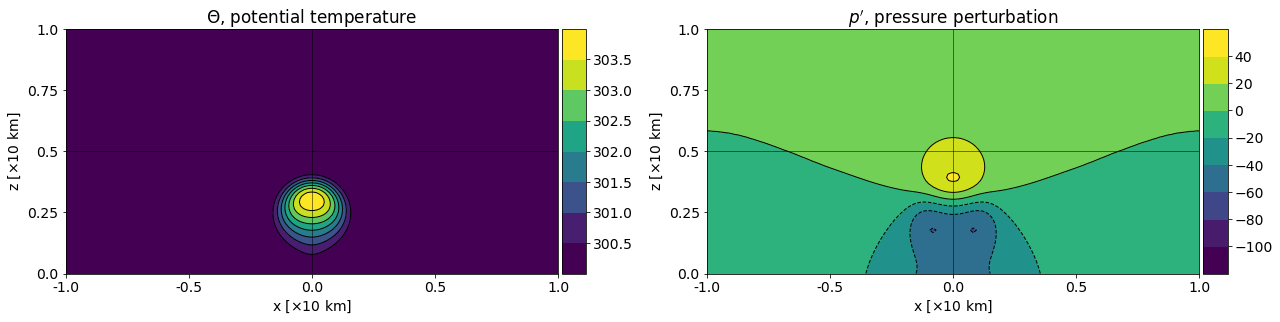

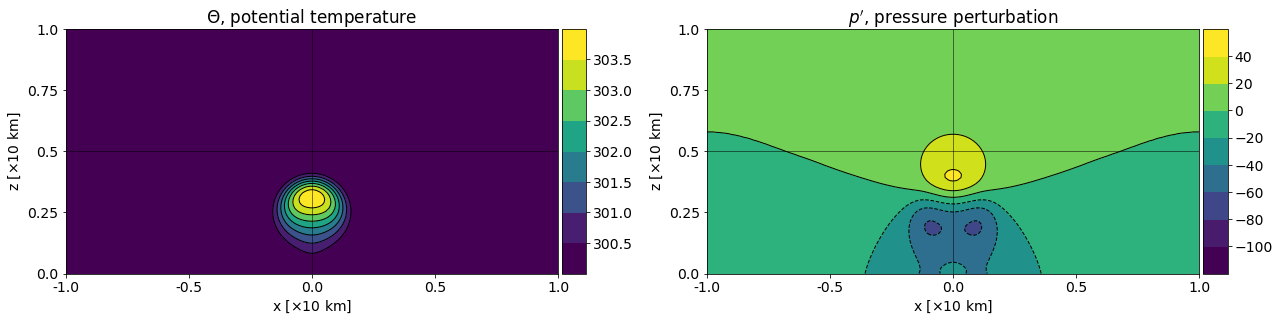

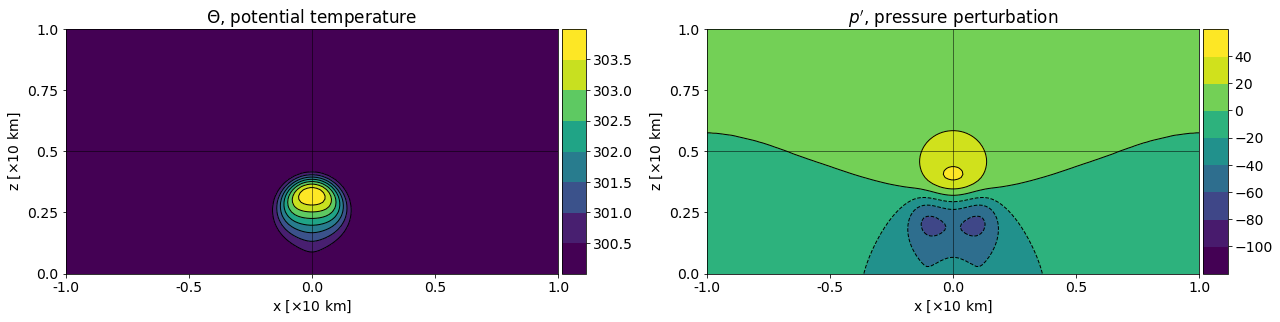

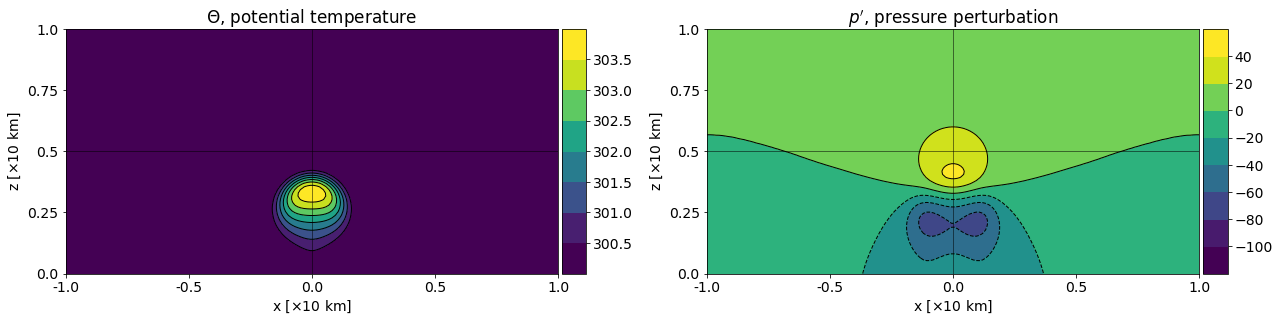

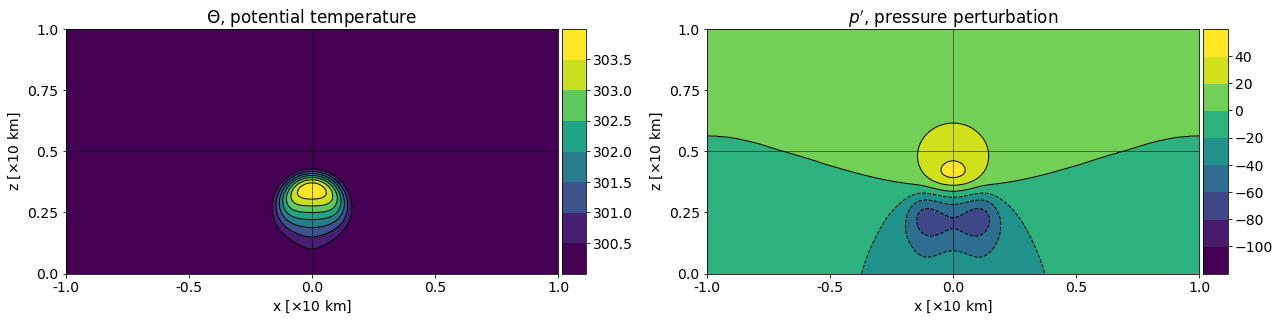

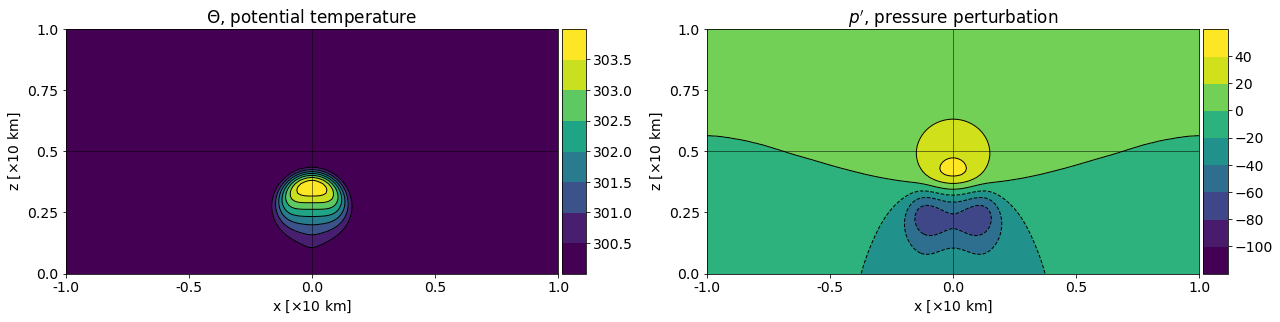

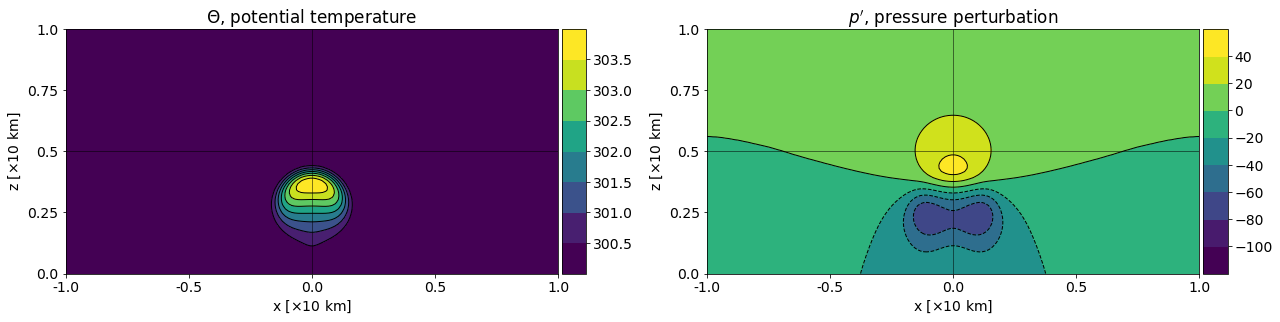

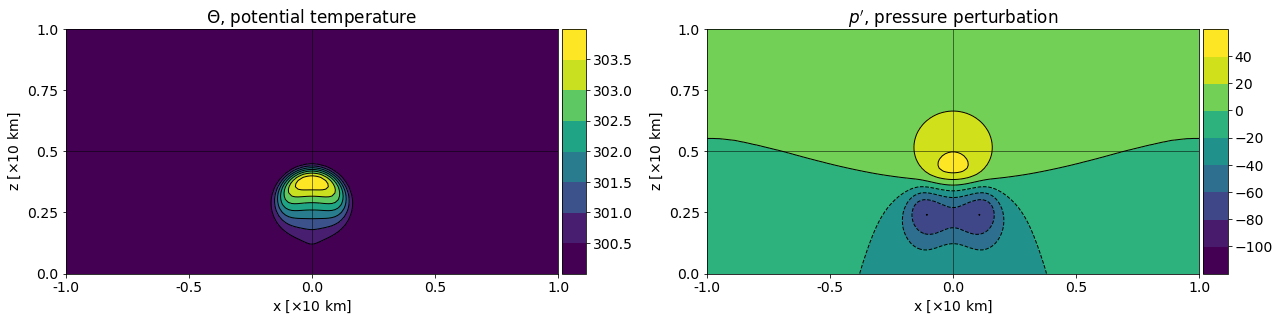

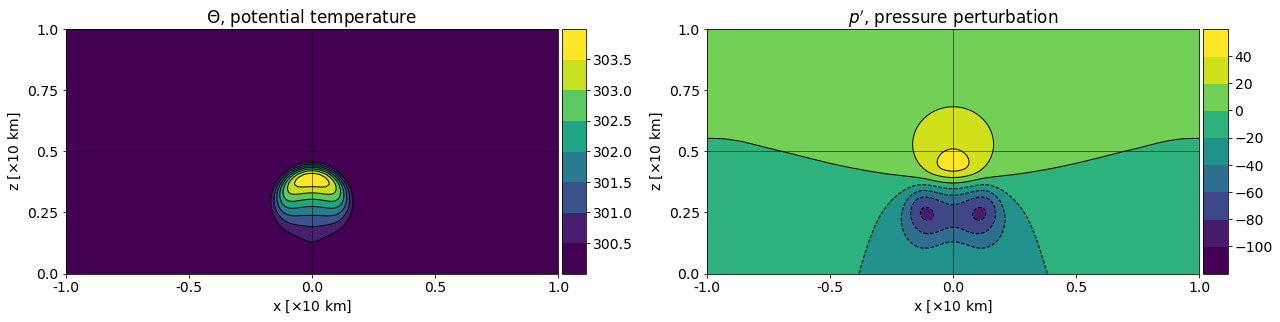

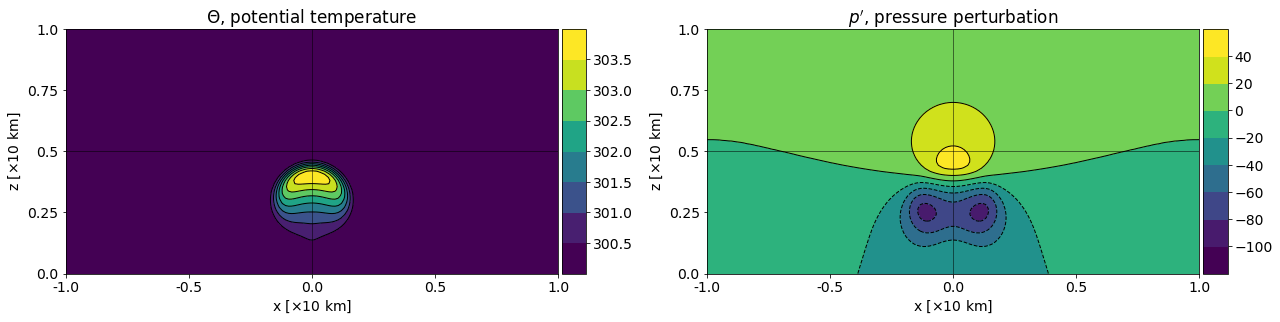

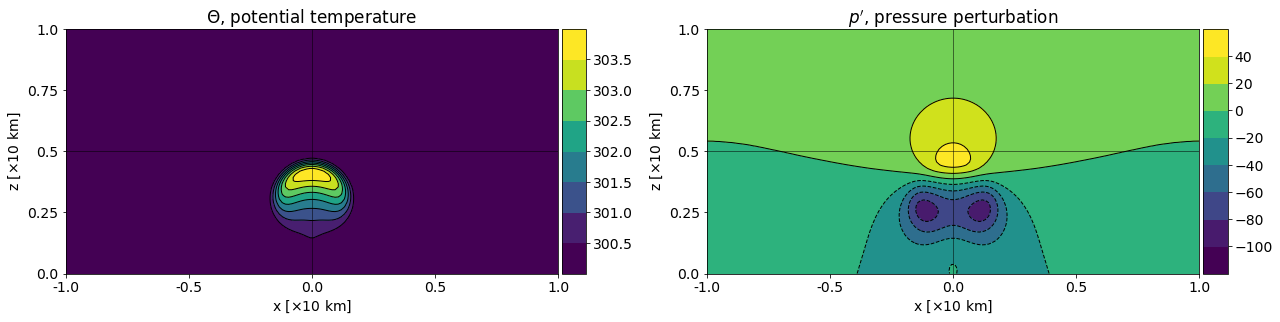

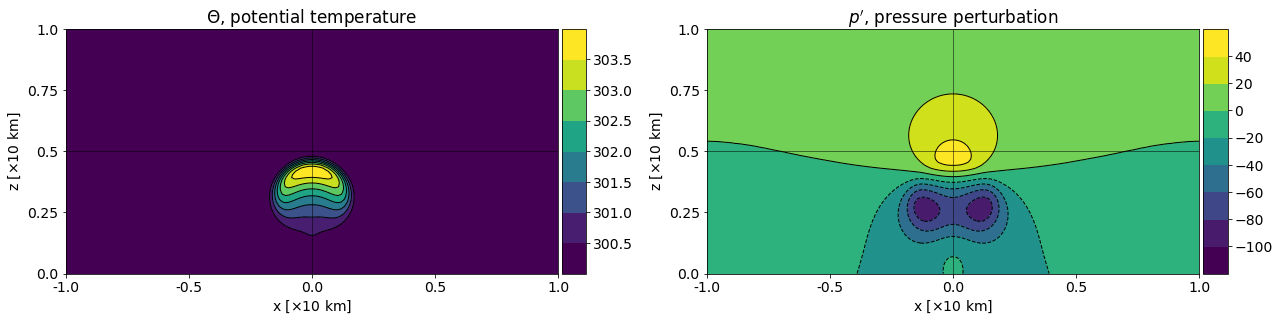

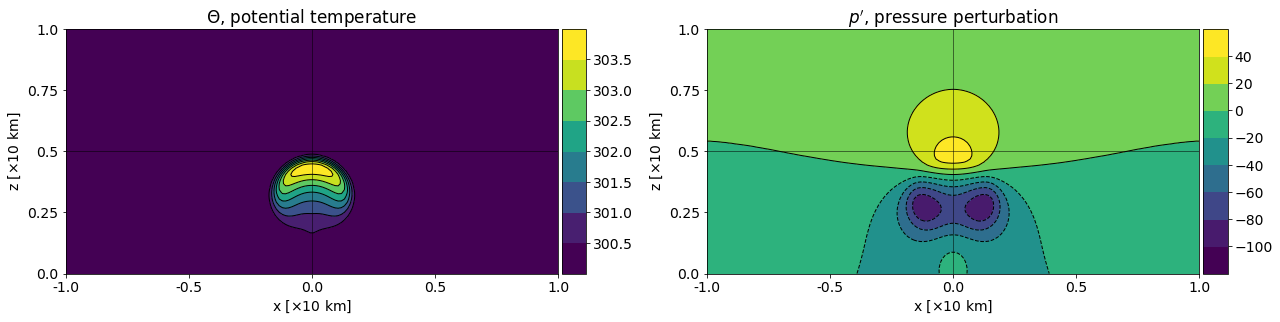

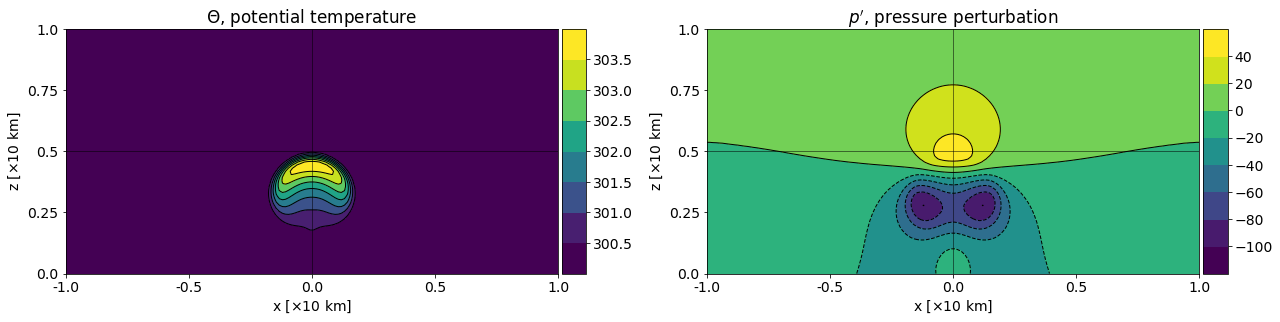

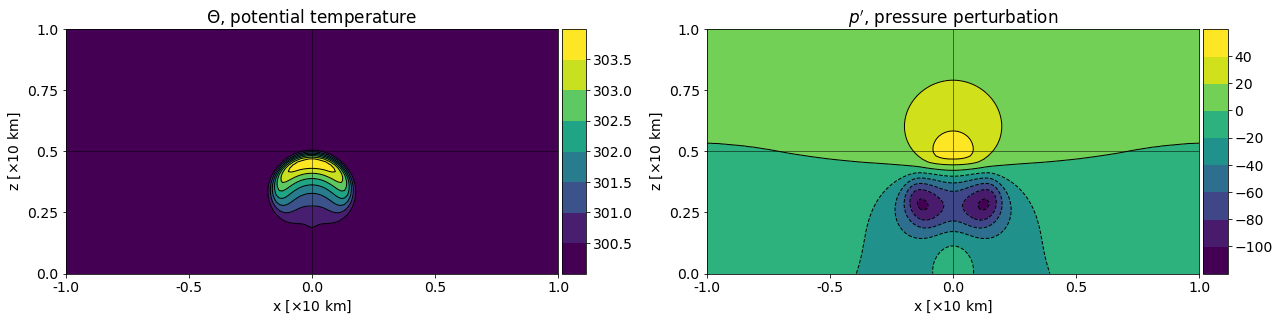

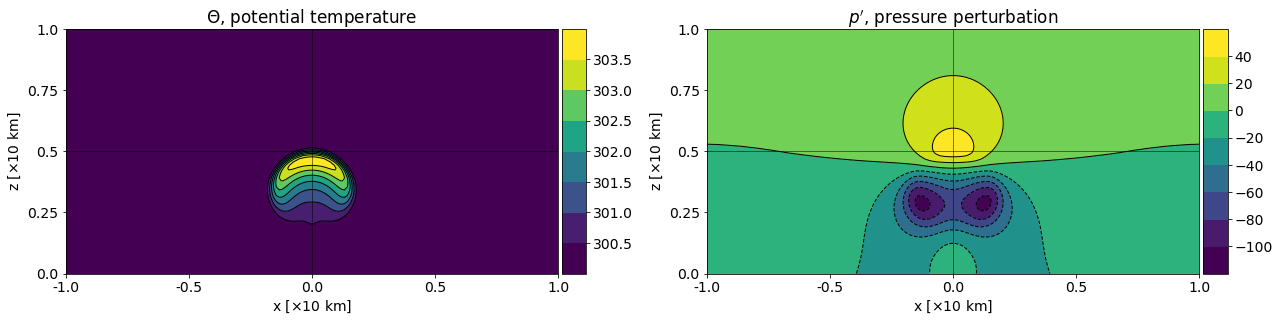

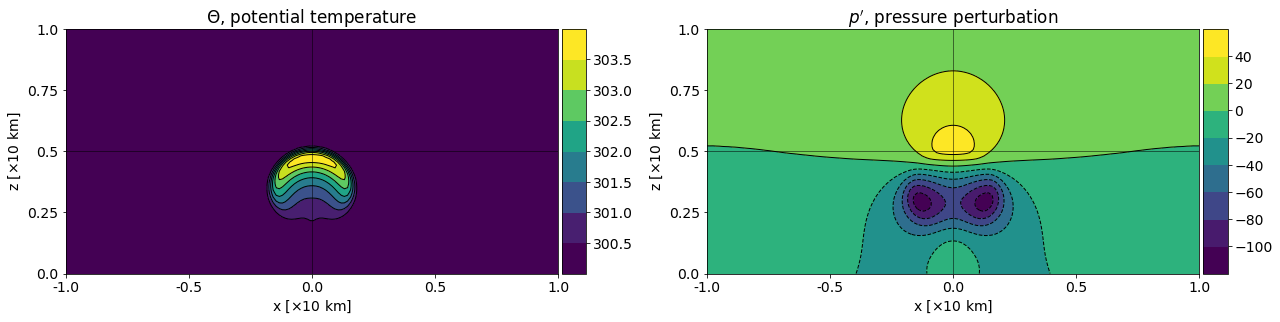

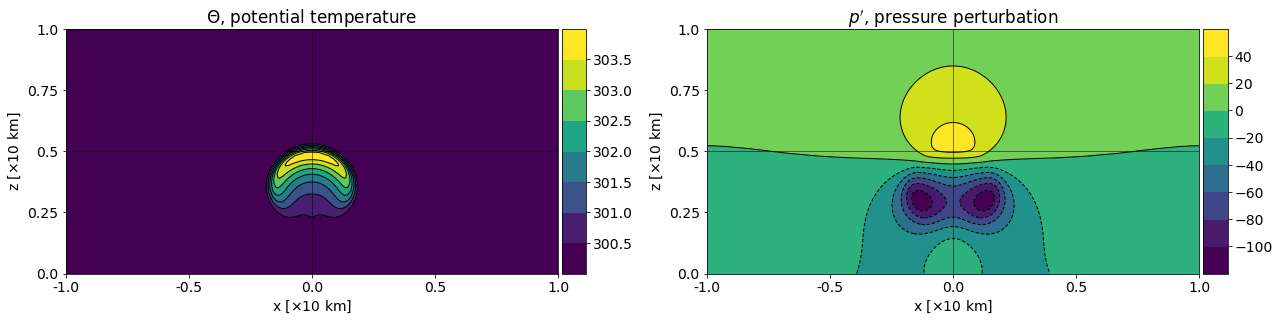

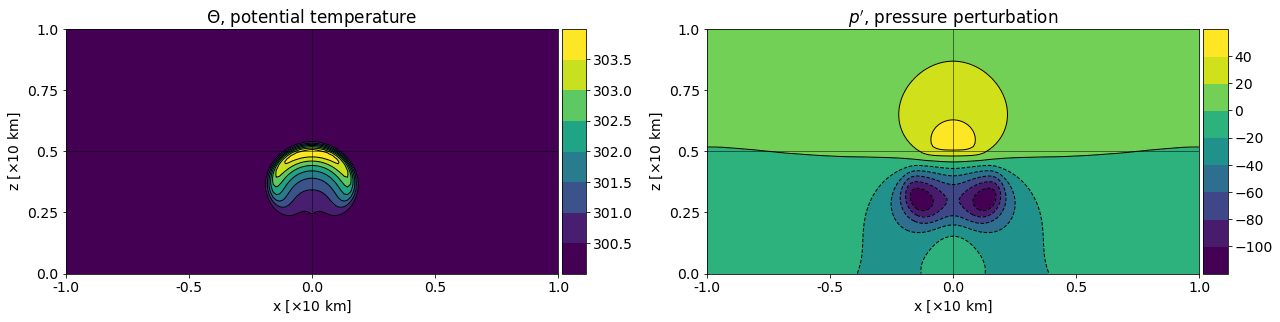

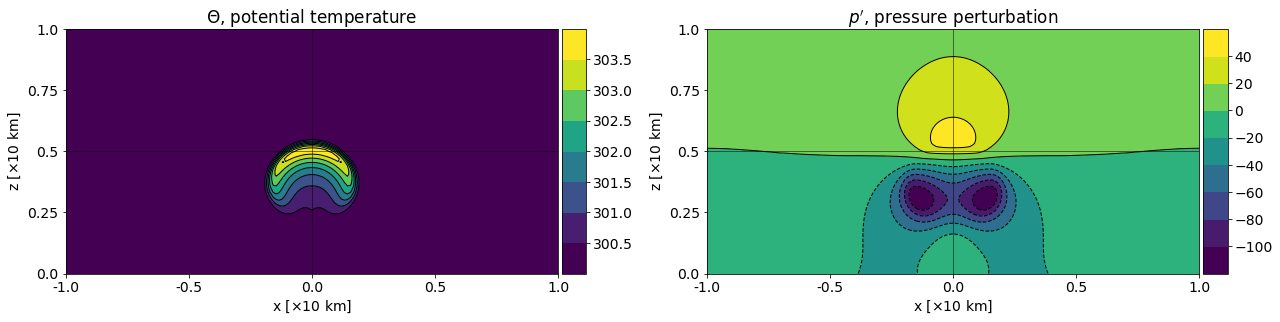

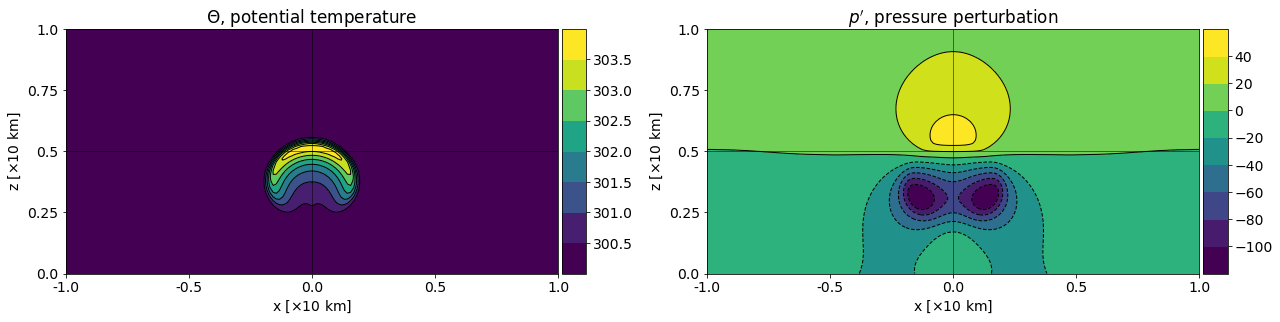

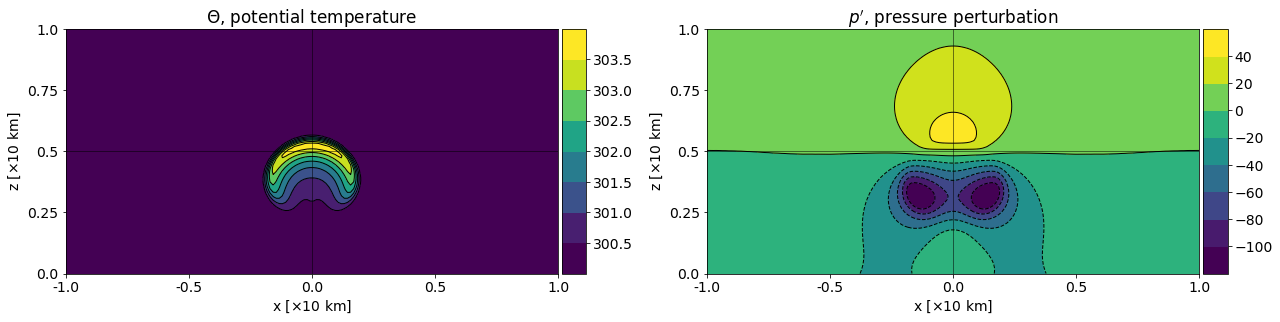

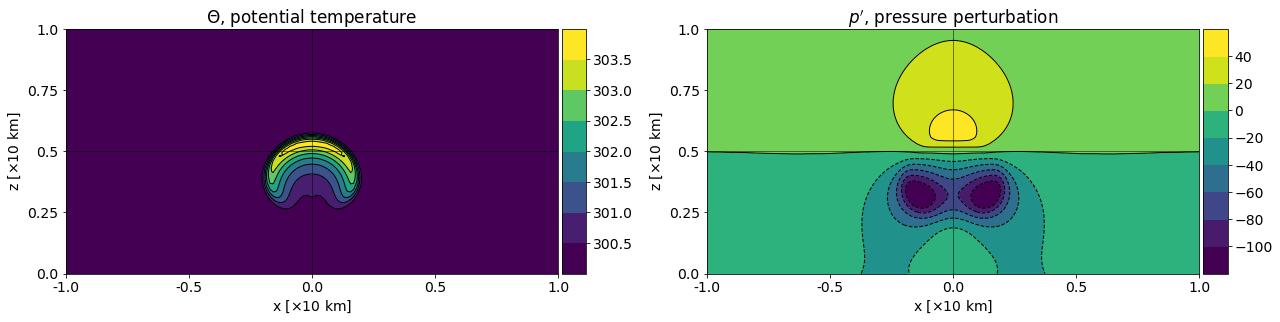

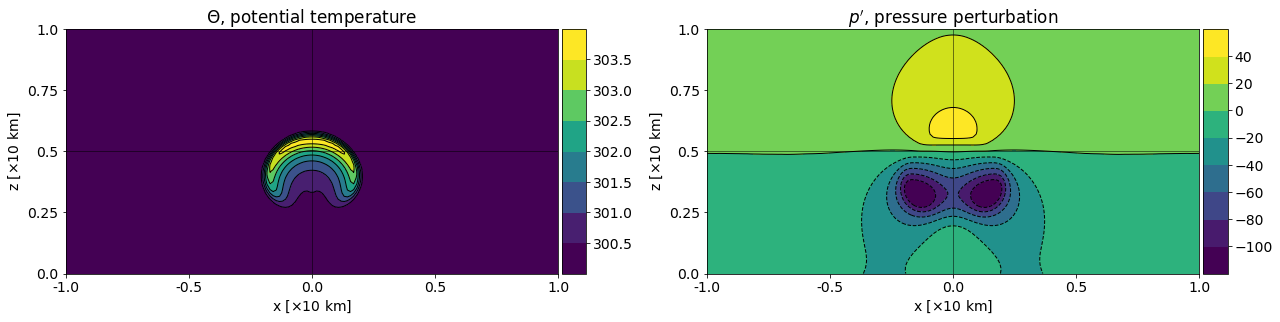

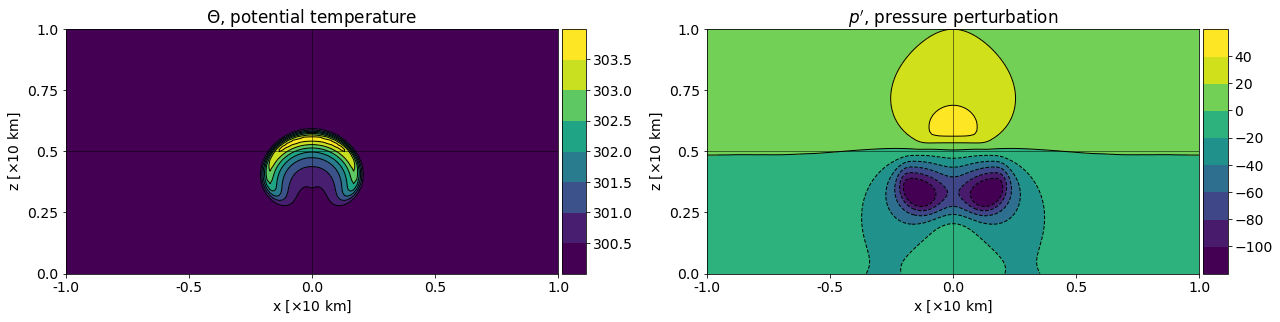

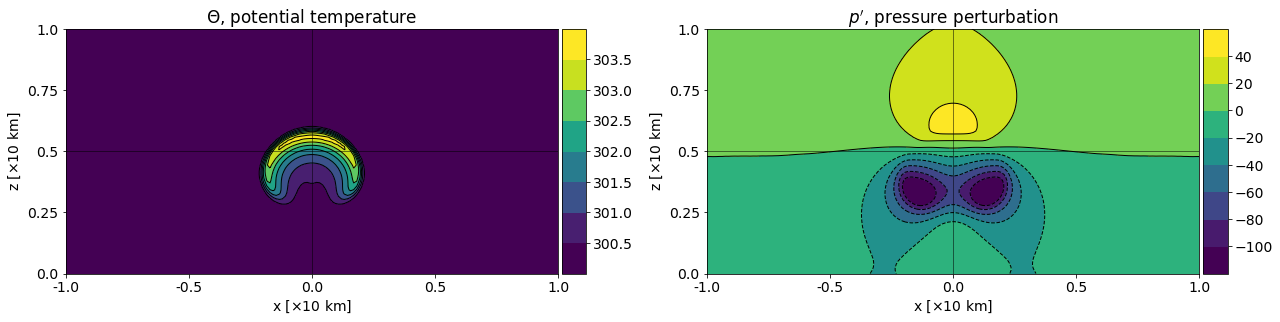

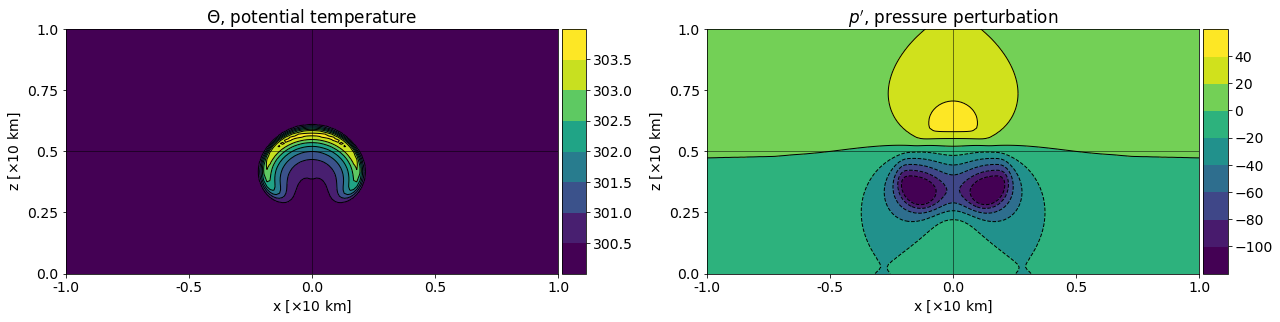

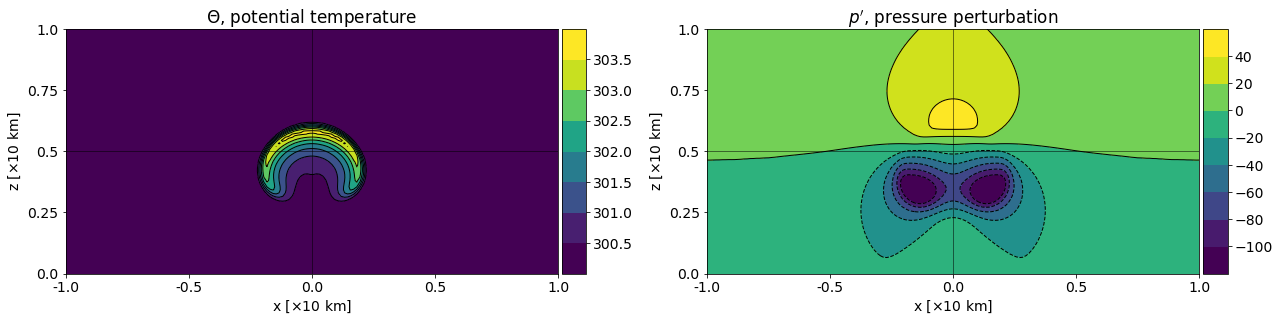

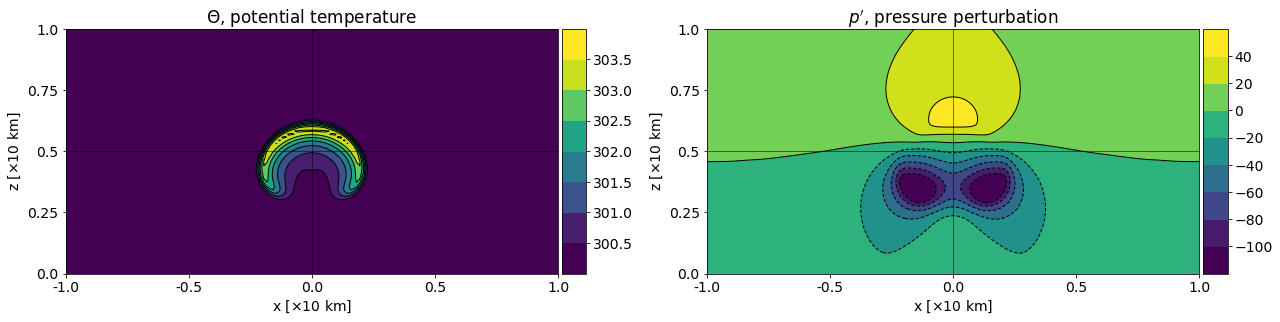

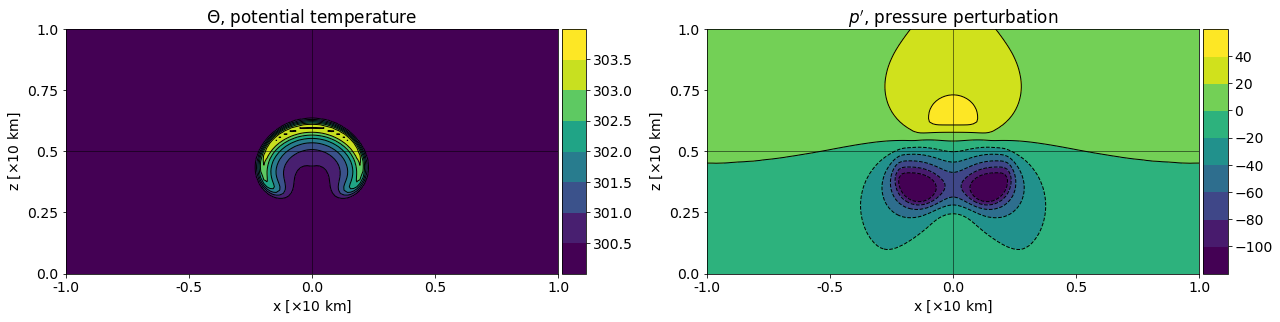

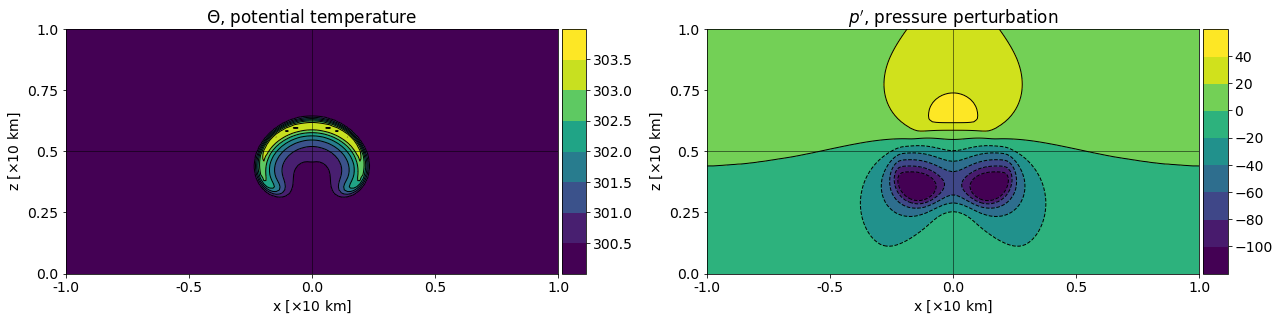

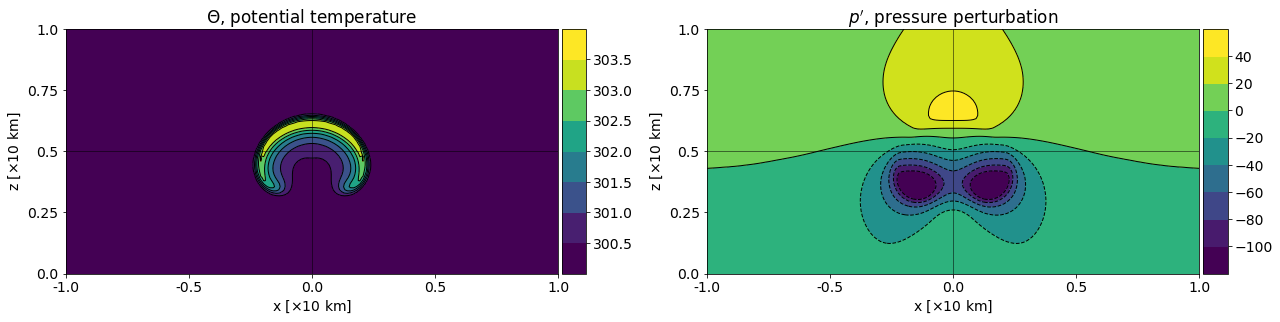

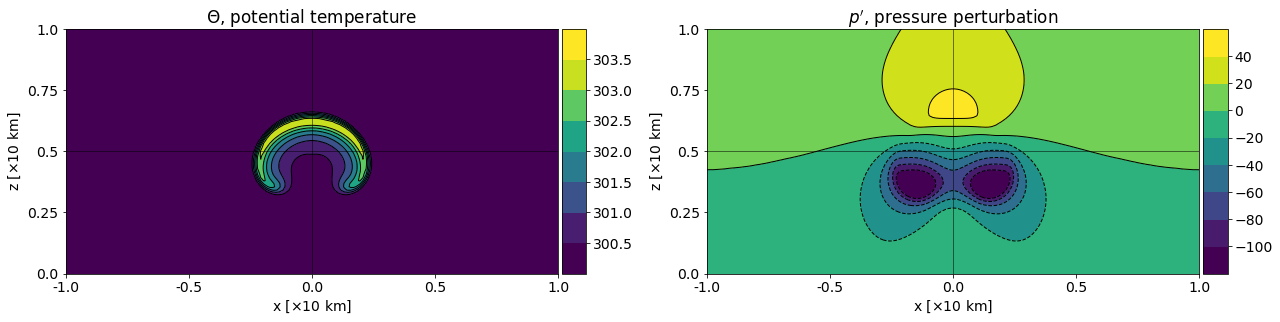

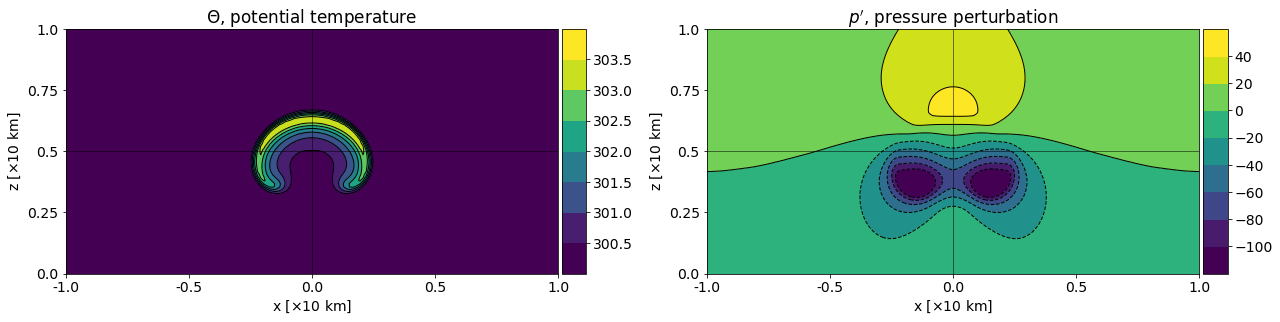

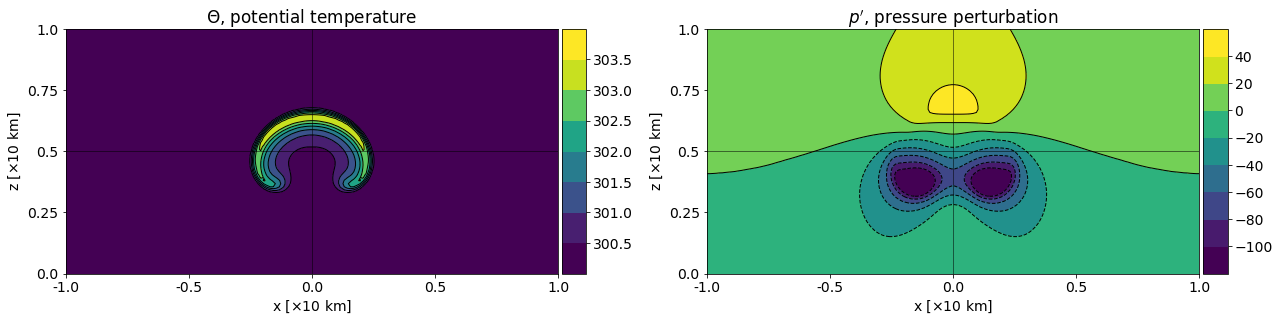

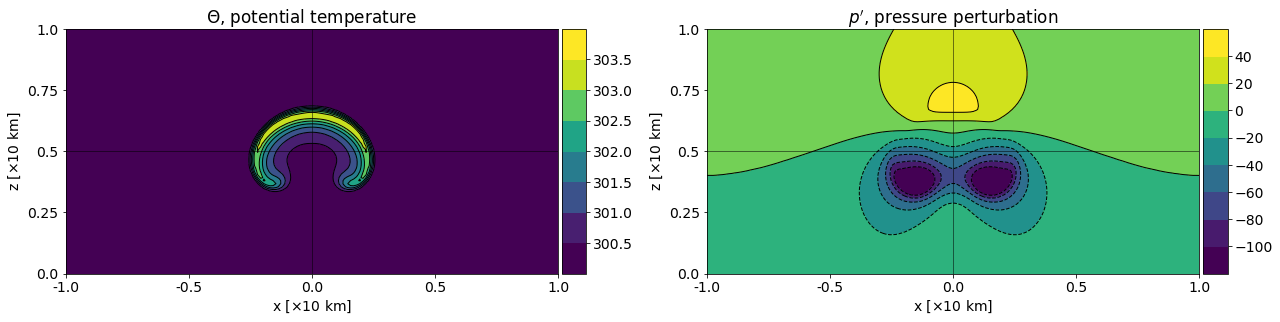

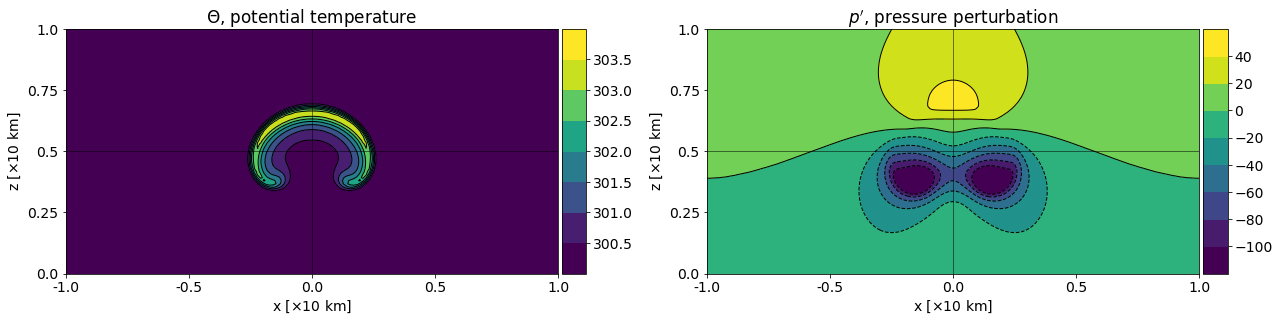

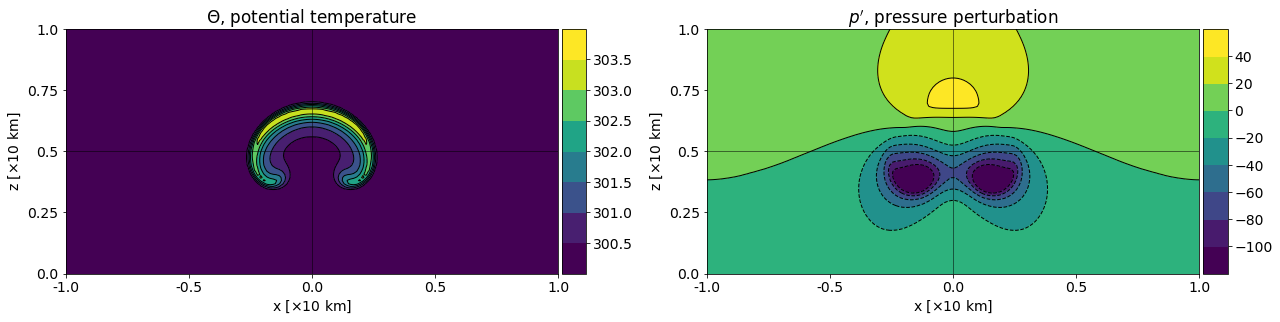

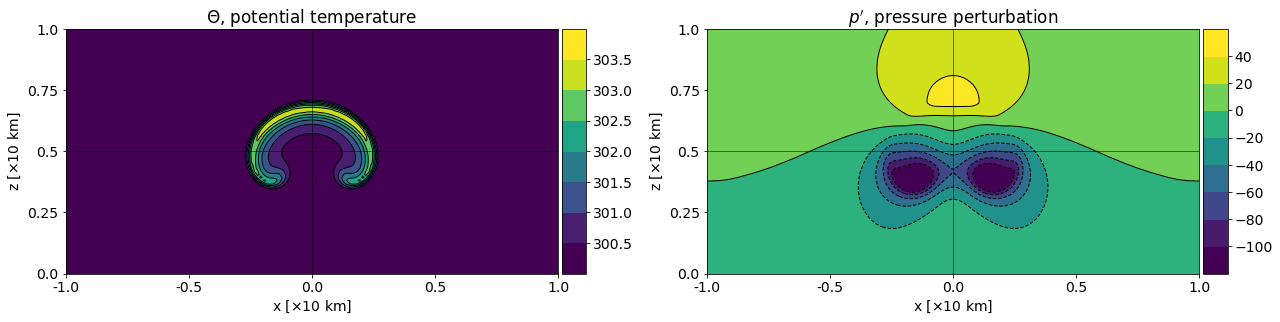

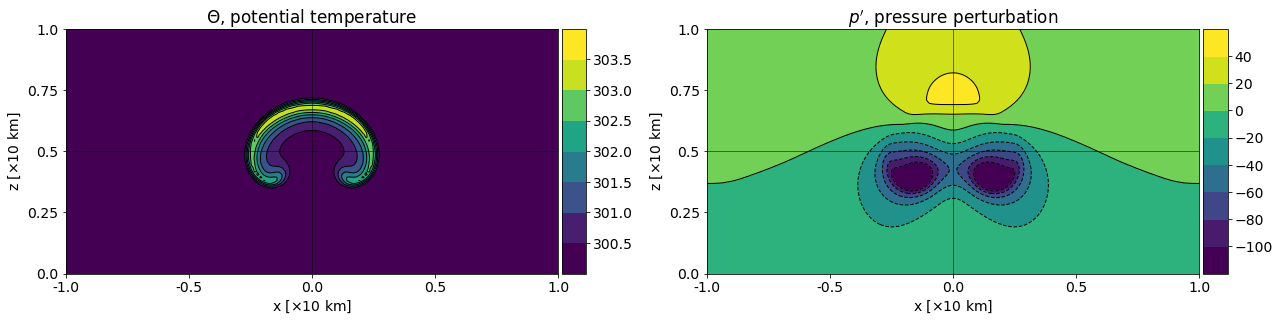

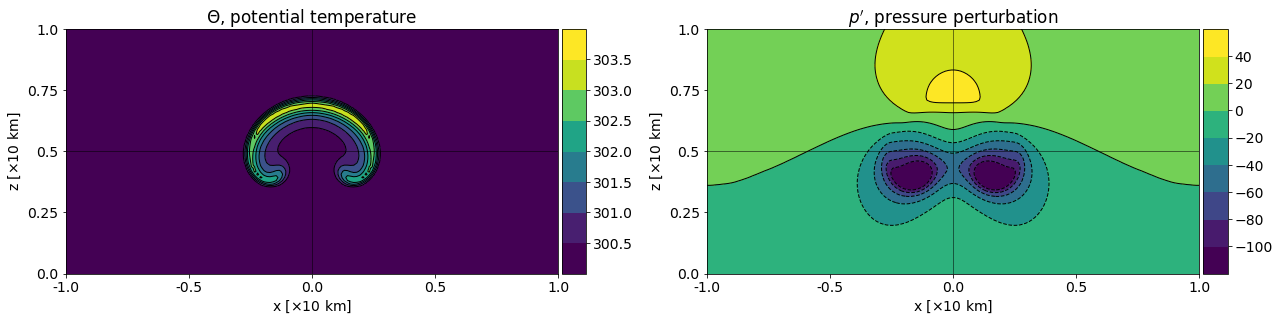

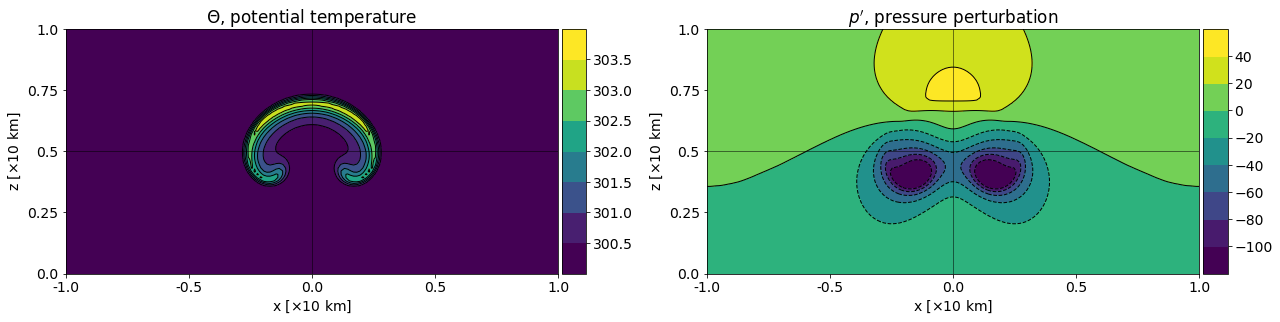

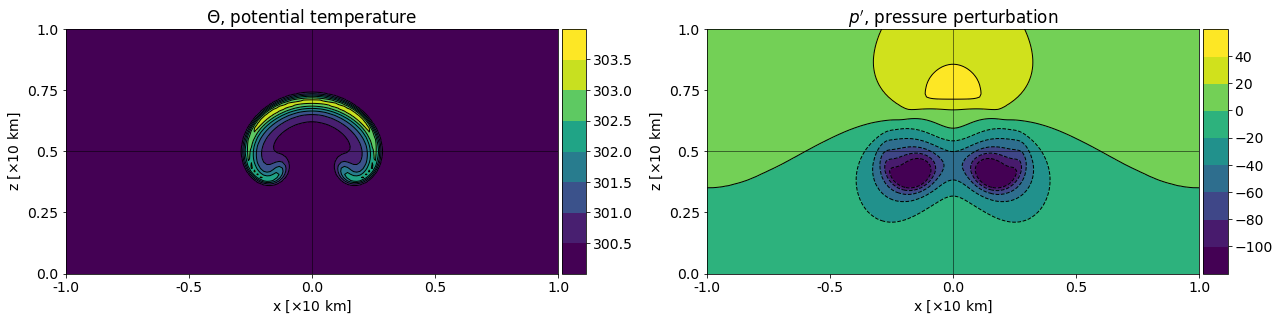

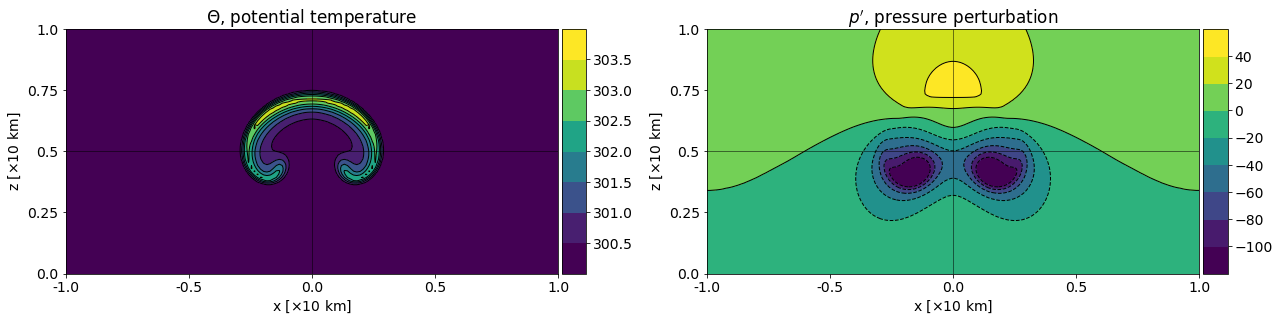

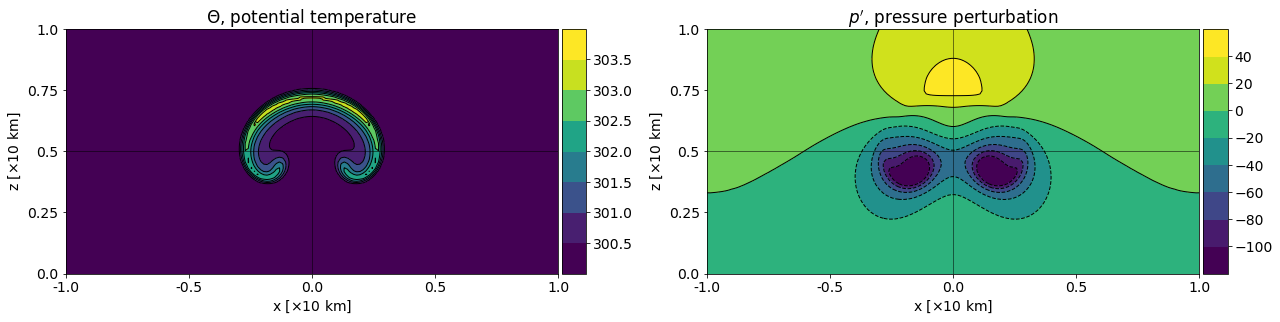

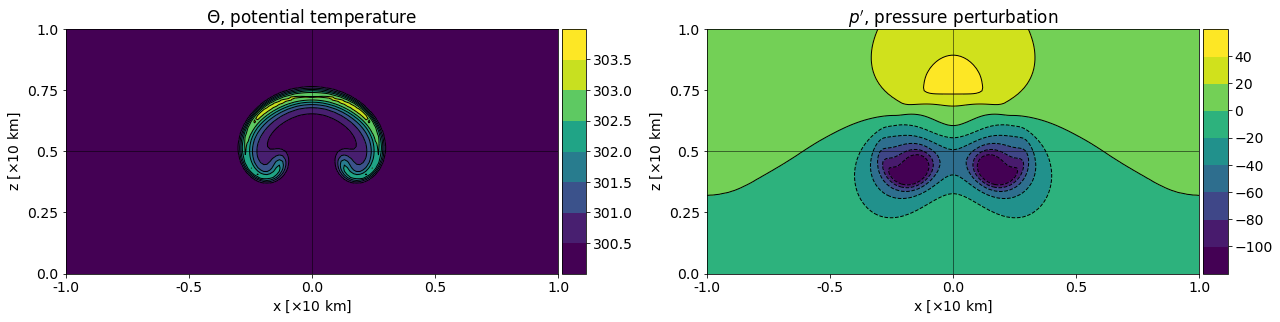

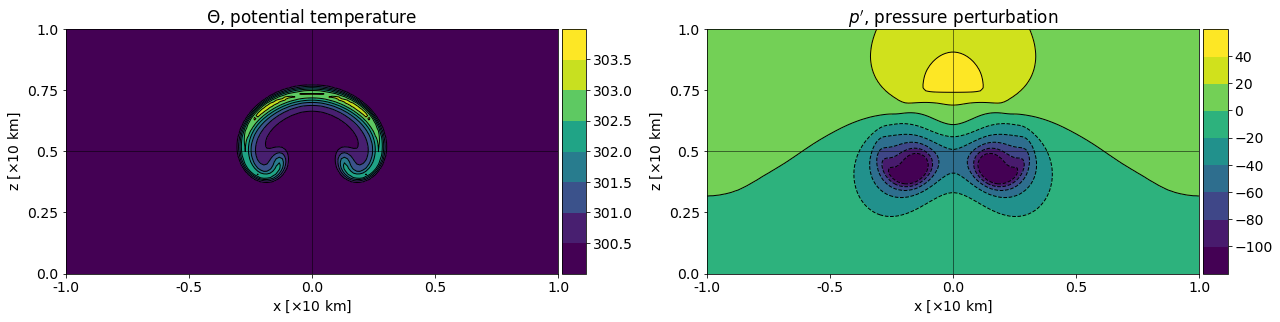

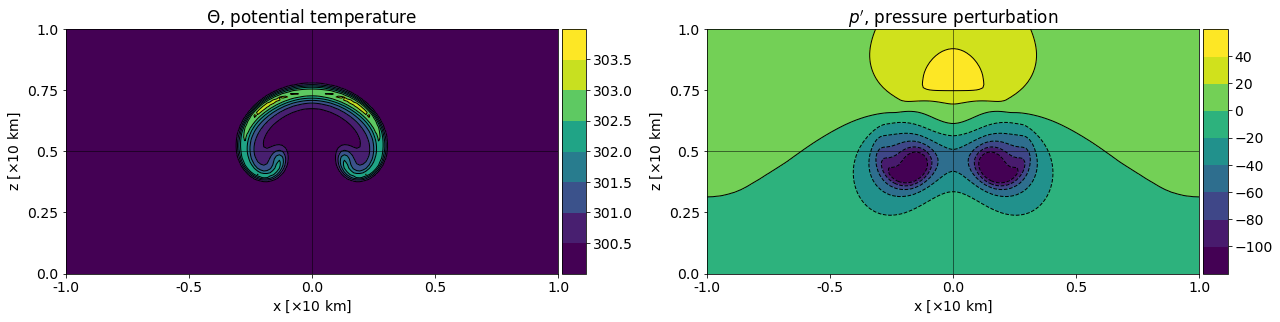

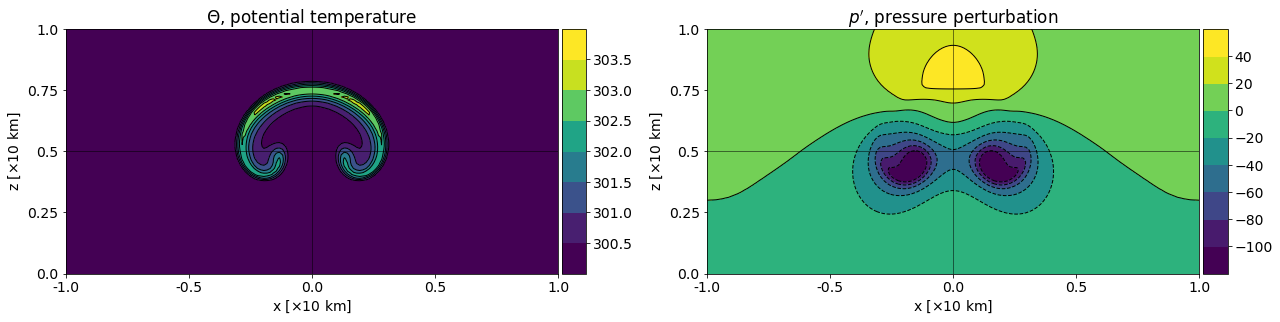

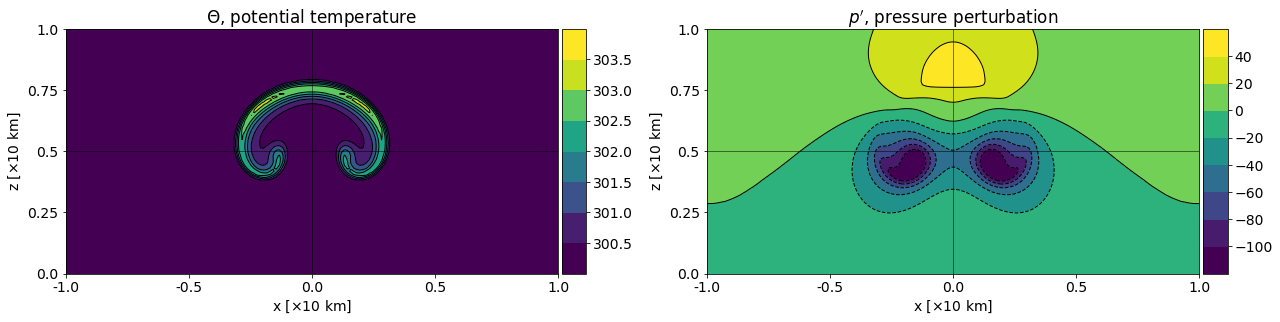

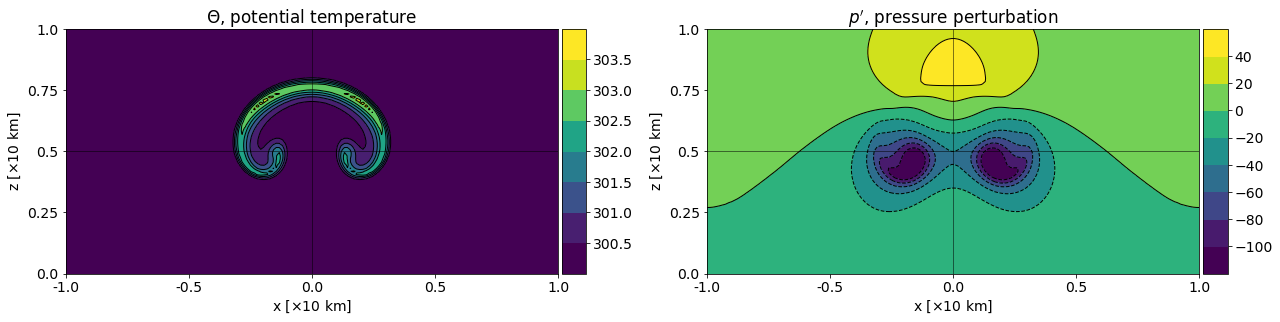

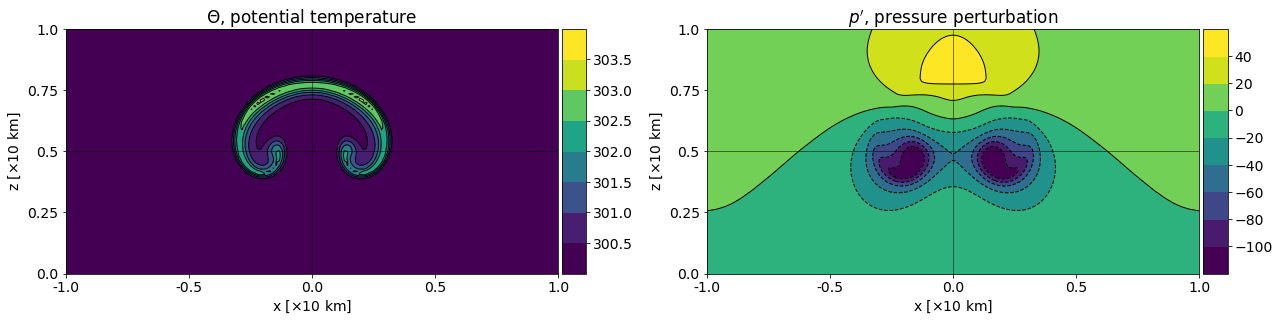

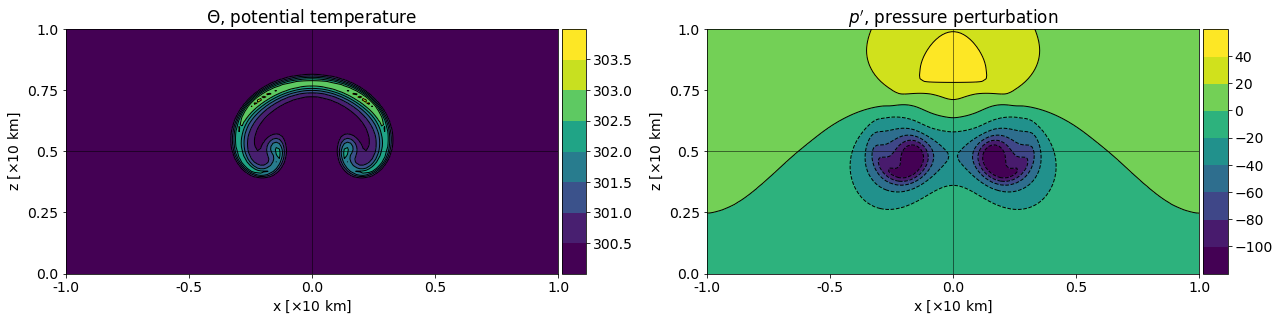

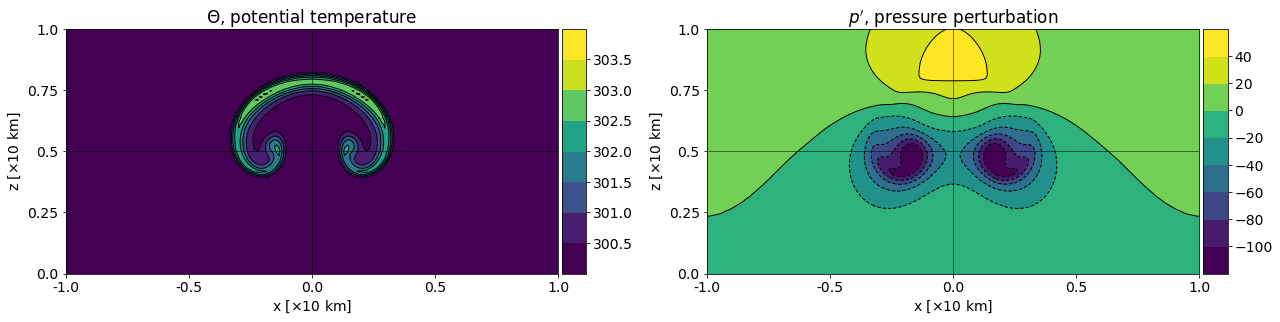

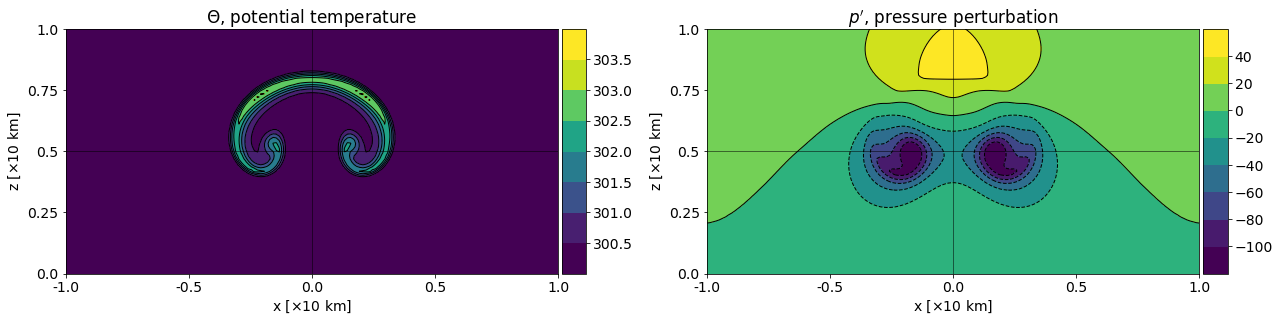

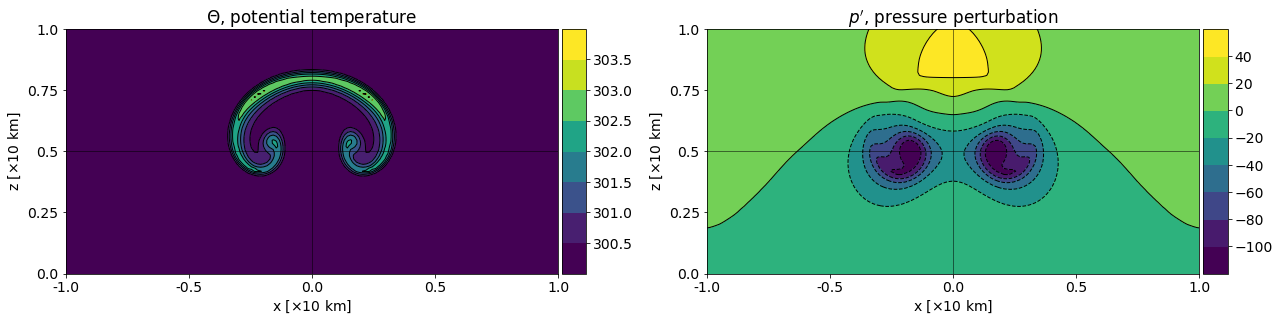

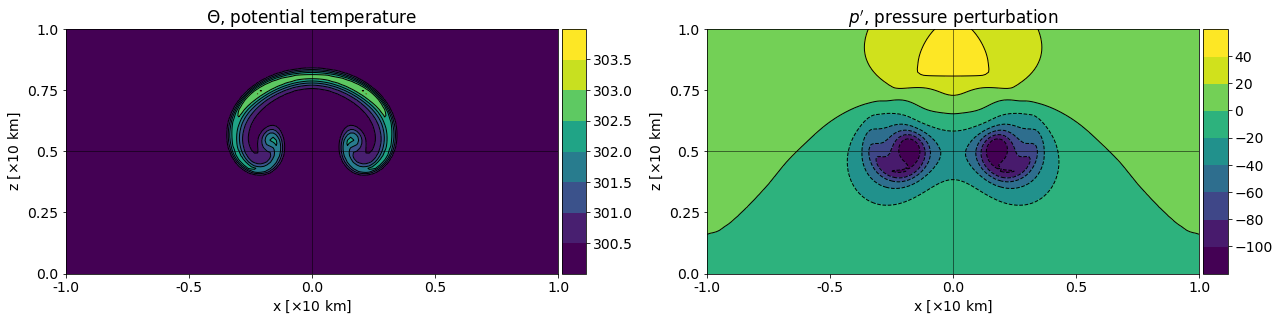

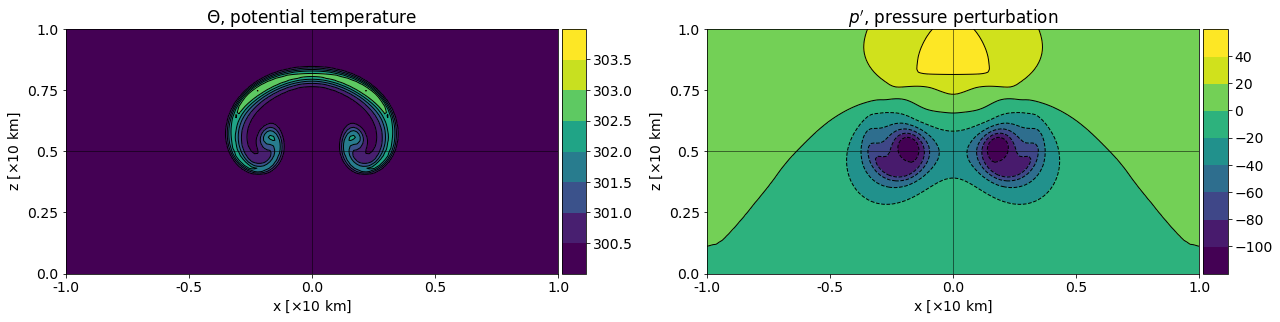

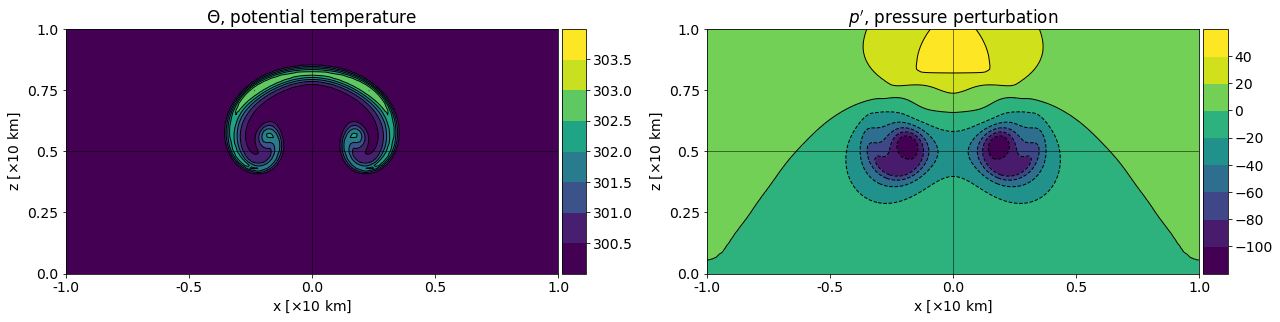

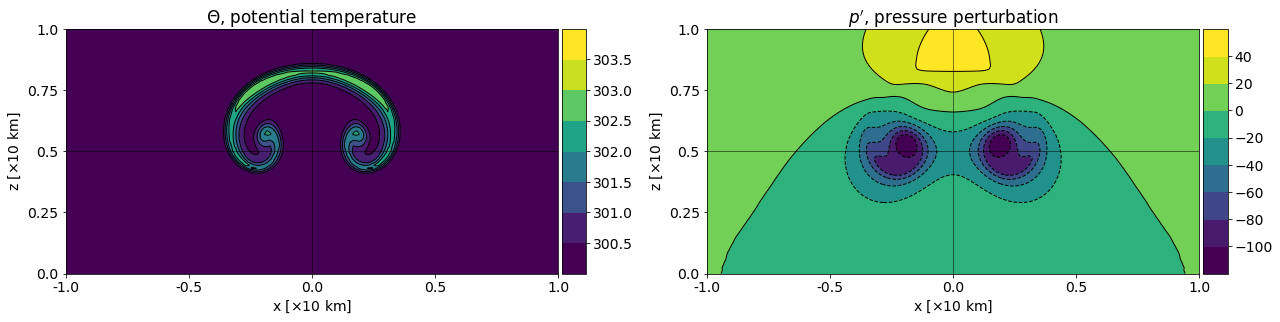

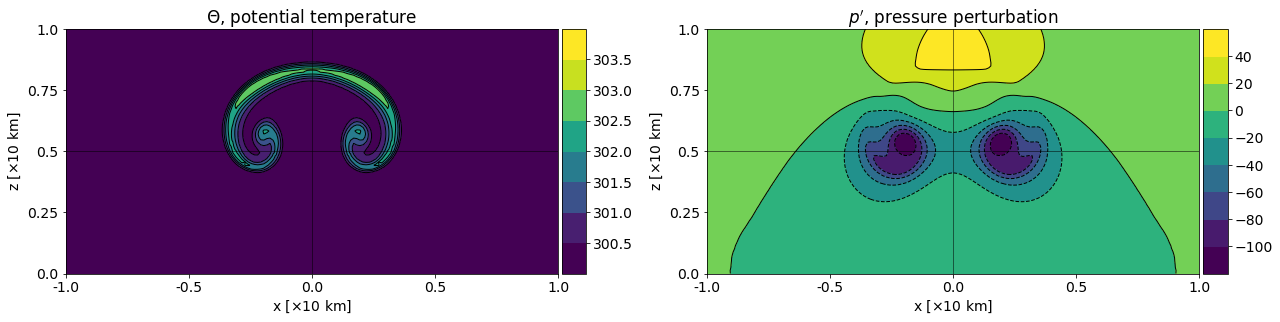

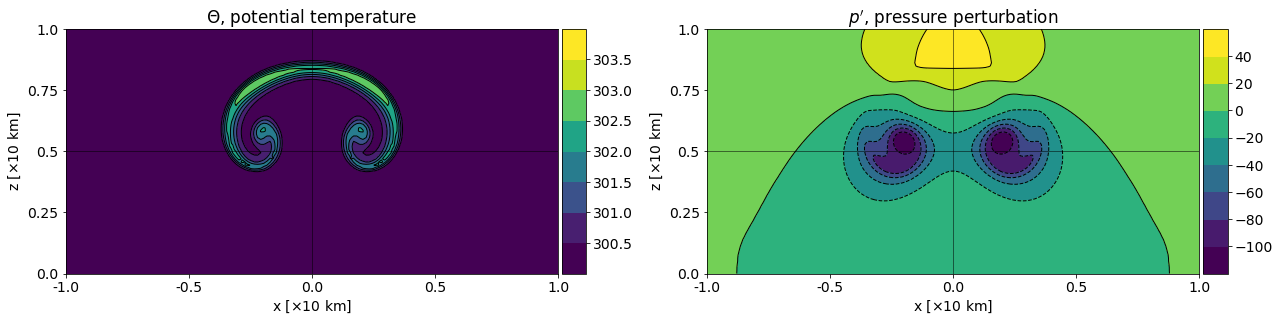

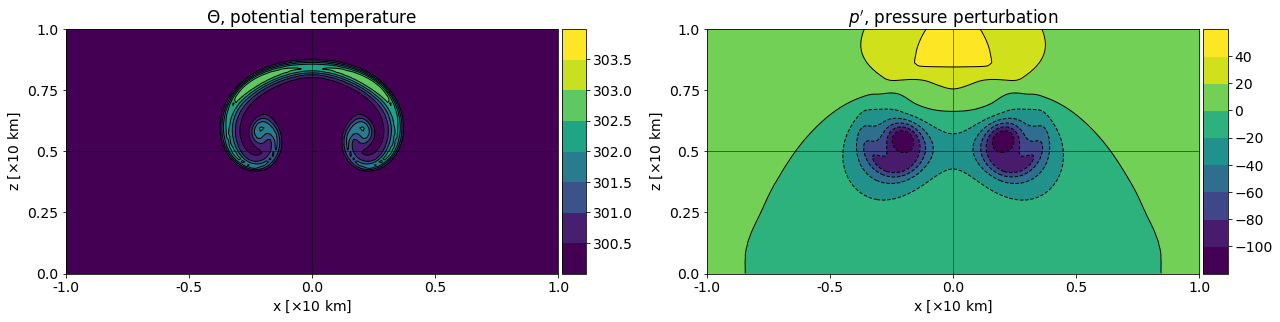

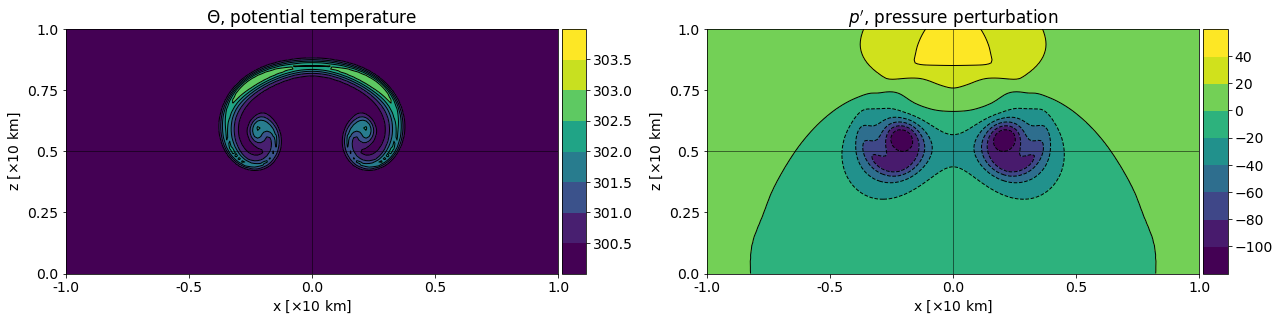

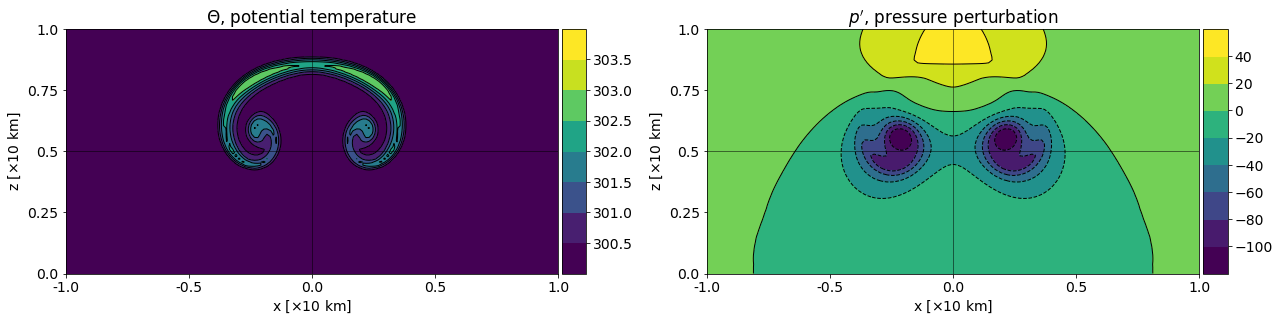

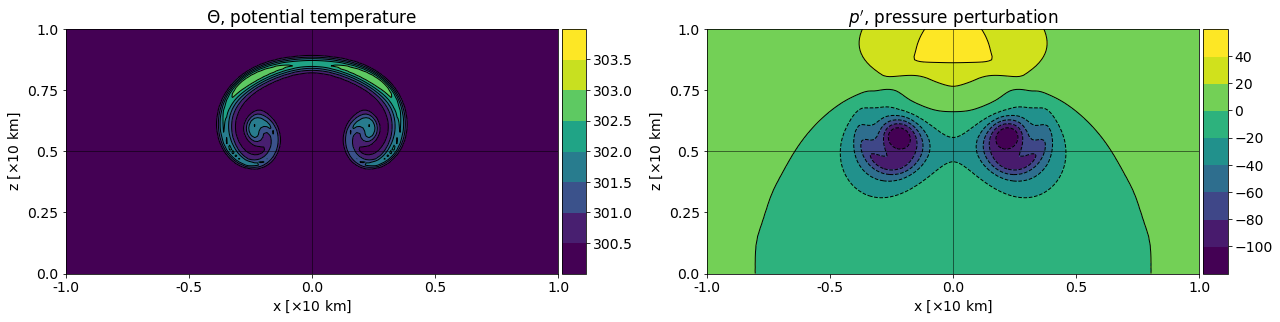

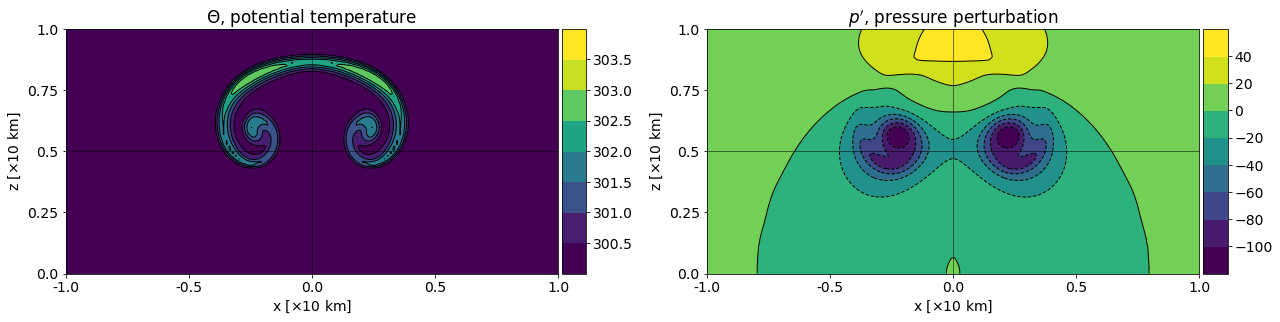

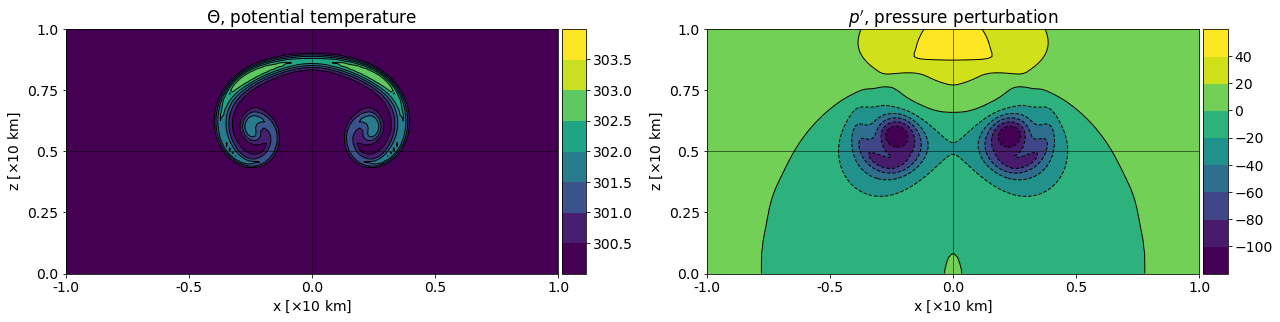

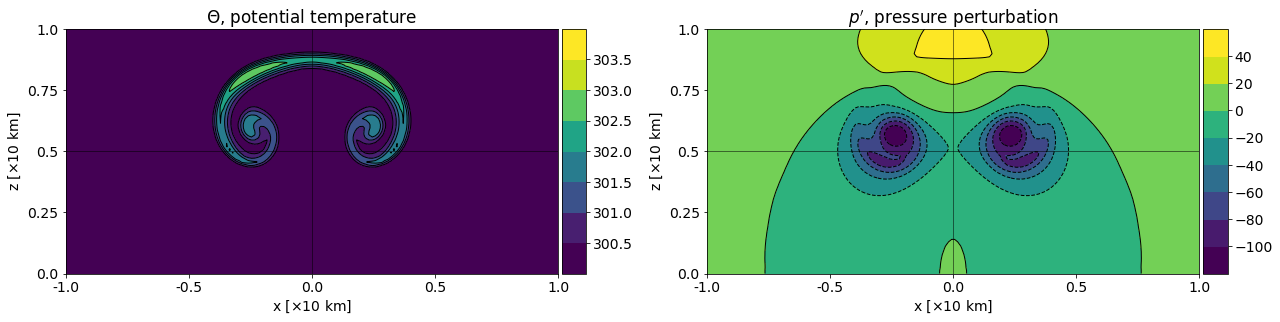

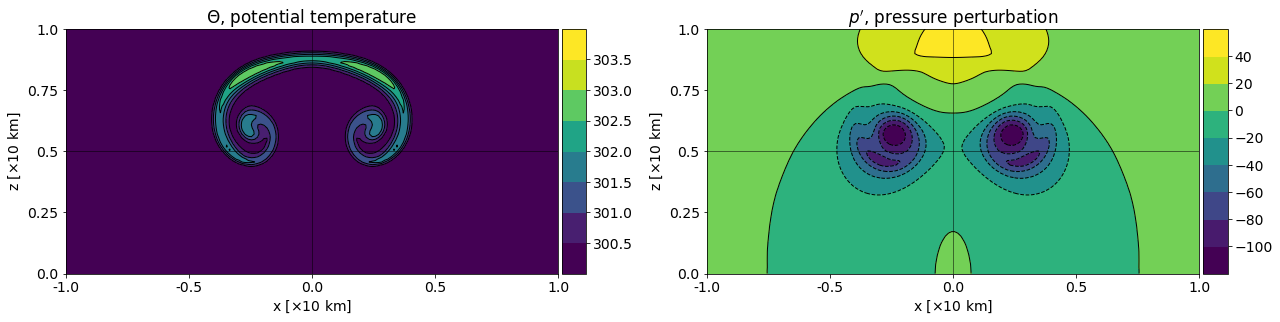

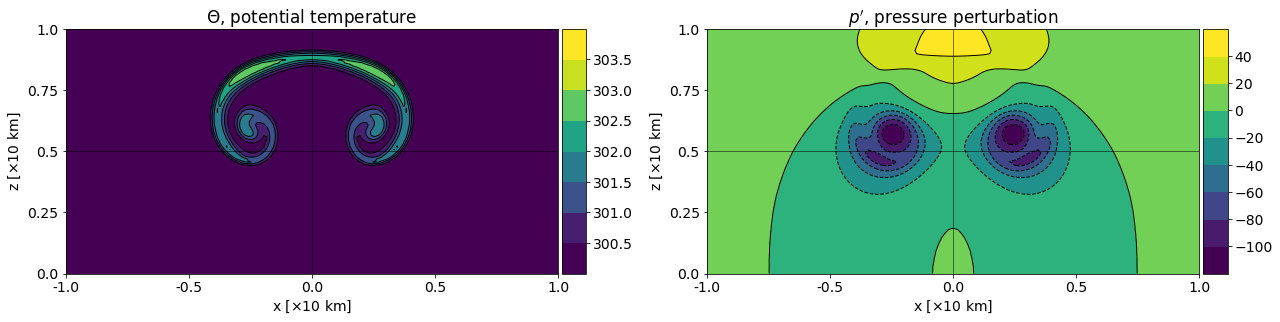

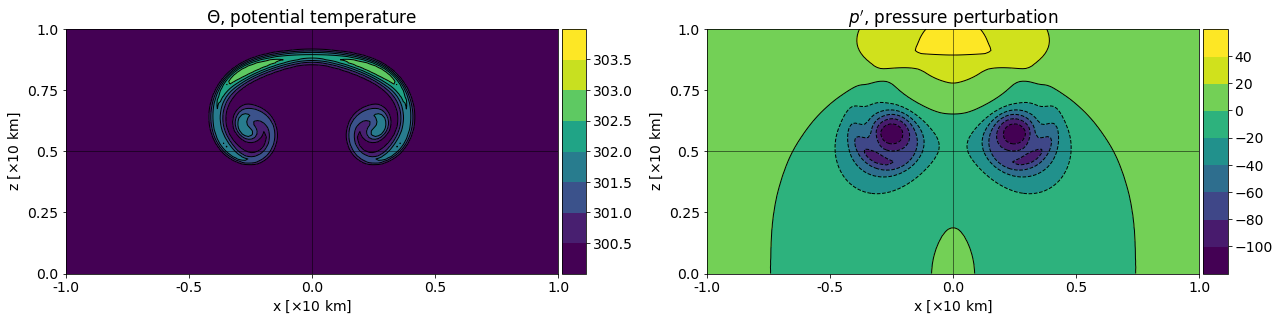

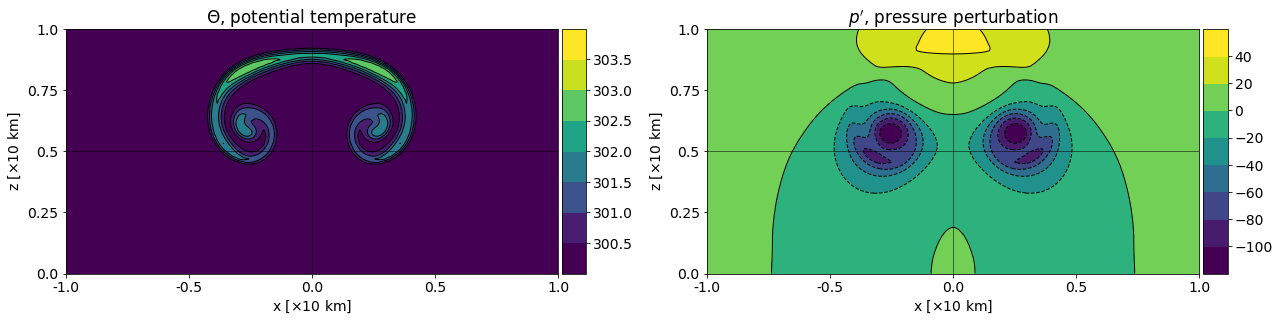

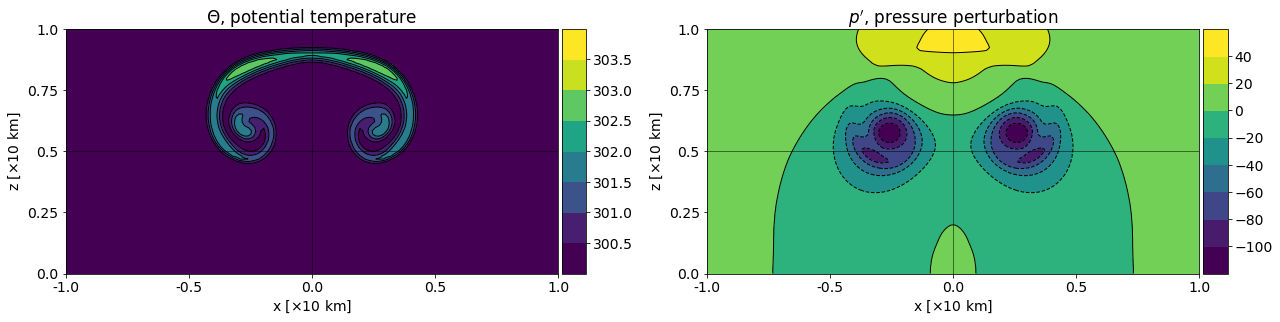

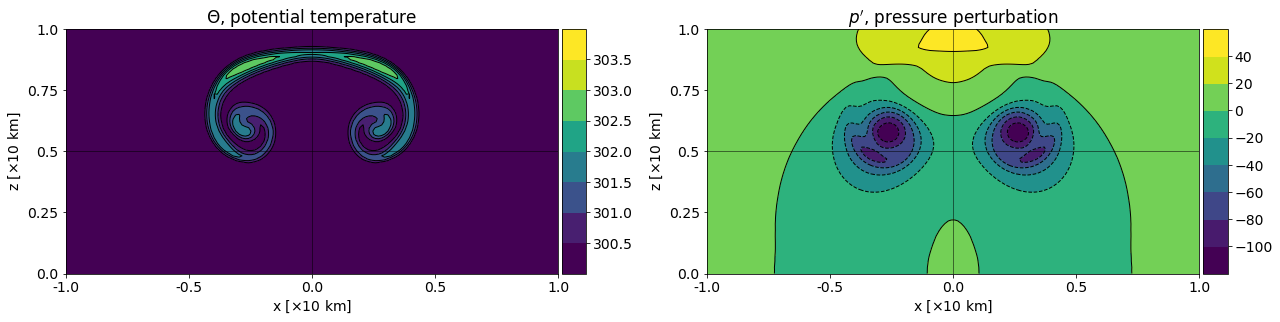

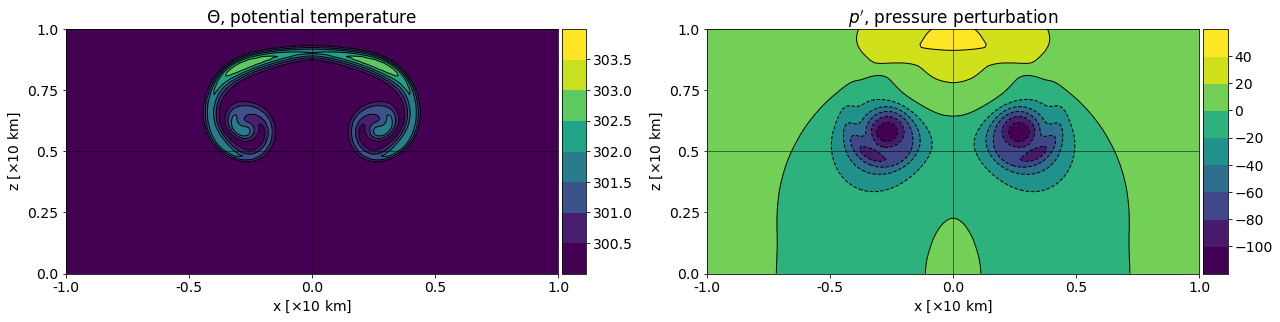

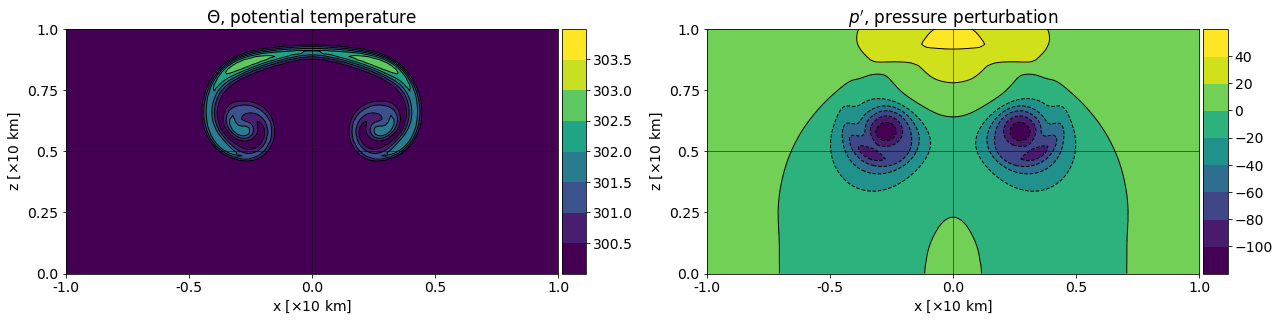

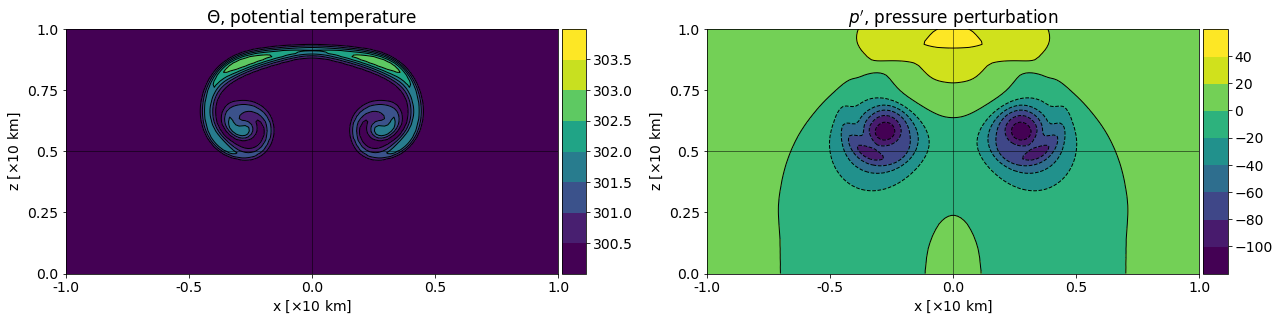

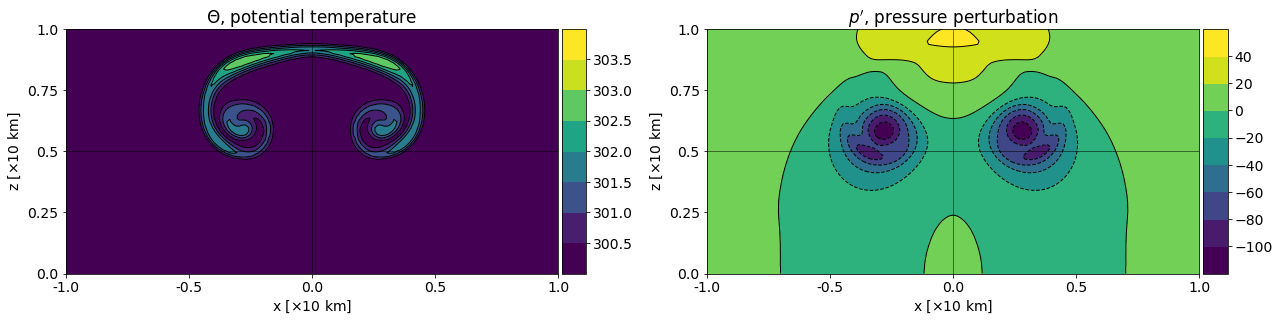

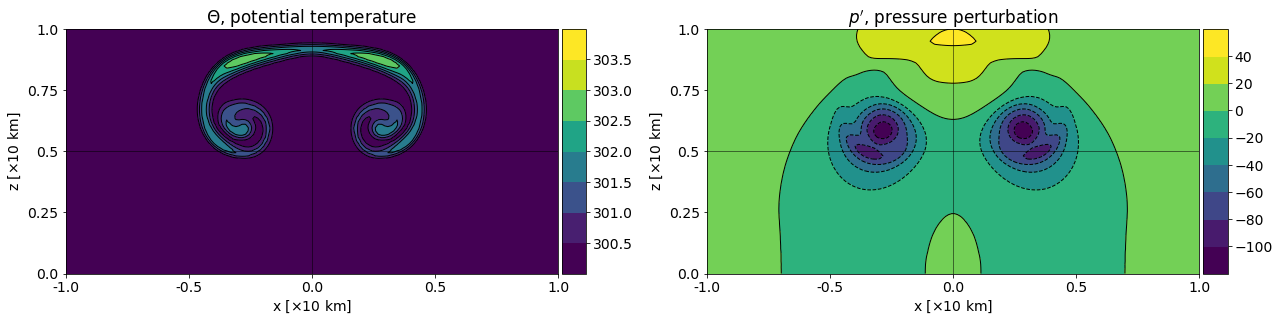

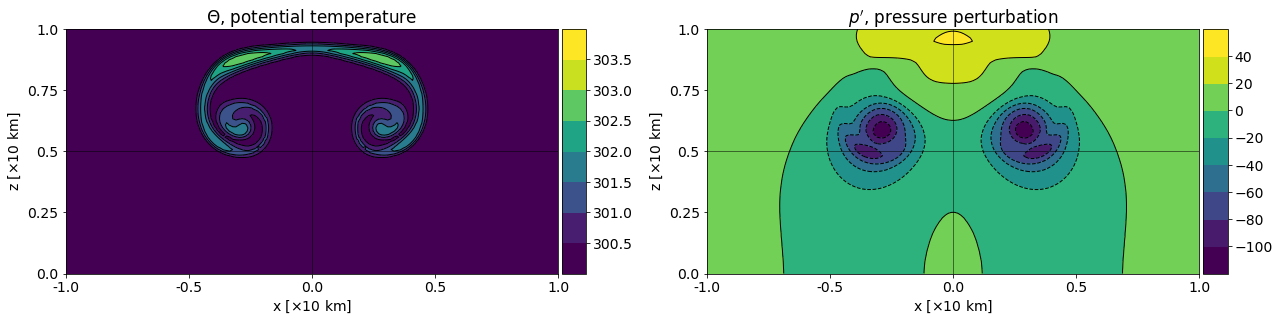

In [83]:
swe = False

attribute = 'p2_nodes'
# attribute = 'rhoX'
et = 1.0
print(attribute)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx, Ny = 160, 80
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

l_typ = 'TIME'
# times = [0.1]
# l_typ = 'WINDOW_STEP'
# times = [163]
times = np.arange(164)
times = np.arange(0.1,1.01,0.01)
tags = tc.get_tag_dict()
tag = tags[9]

def p_converter(ens,rhoY,ud):
    dp2n = np.array([ (mem - mem.mean()) * ud.Msq for mem in ens ])
    kernel = np.ones((2,2))
    dp2c = np.array([signal.fftconvolve(mem, kernel, mode='valid') / kernel.sum() for mem in dp2n])

    P0 = (rhoY**(ud.gamm-1.0) - dp2c)**(1.0/(ud.gamm-1.0))
    p = rhoY**(ud.gamm) - P0**(ud.gamm)
    p *= ud.p_ref
    return p
# tag = 'ic'

print(times, tag)
# if len(times) < 1:
#     tag = 'ic' if times[0] == 0.0 else tags[9]

prt = utils.prt_time(debug=False)
attr_labels = pt.labels_increment()

def get_ens(tc, sfx , diff, attribute, swe=True):
    ens = tc.get_ensemble(times, 1, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=True)[1:]
    rho = tc.get_ensemble(times, 1, 'rho', sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=True)[1:]
    if swe:
        ens = ens[:,0,:]
#     else:
#         ens *= 100.0
#     if len(times) > 1:
#         ens = ens[1] - ens[0]
#     else:
#         ens = ens[0]
#     ens = ens.T #/ rho.T
#     ens = ens.T
#     
    label = sfx + '_' + attribute
    return label, ens

diff = False
sfx1 = 'comp_imbal_half_CFLfixed_ib-0'
sfx_ref = 'psinc_noib_CFLfixed'

sfx_ref = 'truth_ib-0'
# sfx1 = 'debug_imbal_CFLfixed_ib-0'
sfx1 = 'truth_CFLfixed_ib-0'
# sfx1 = 'comp_imbal_noib_CFLfixed'

l2, rho = get_ens(tc, sfx1, diff, 'rho', swe=False)
l2, a1 = get_ens(tc, sfx1, diff, 'rhoY', swe=False)
l2, a2 = get_ens(tc, sfx1, diff, 'p2_nodes', swe=False)
la = 'Euler vortex'
# times = [0]
# tag = tags[9]
# _, ll_ref = get_ens(tc, sfx_ref, diff, attribute, swe=False)
# aa = a2
print(aa.max(), aa.min(), aa.max() - aa.min())


fn_pickle = tc.get_filename(1,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
file.close()
    
print(aa.shape)
if sfx1 == 'artigen' or sfx1=='psinc':
    np.save('ic_%s_%s.npy' %(attribute,sfx1), aa.T)
    
# diff = ll_ref - aa
for frn in range(len(times)):
    pp = p_converter(a2[np.newaxis,frn,...],a1[frn,...], ud)[0]
    Y = a1[frn,...] / rho[frn,...] * 300
    ll = [[Y.T, '$\Theta$, potential temperature'], [pp.T, '$p^\prime$, pressure perturbation']]
    pl_lst = ll

    lvls1 = np.arange(300.5,304.0,0.5)
#     lvls2 = np.arange(-0.1,0.1,0.025)
    lvls2 = np.arange(-100,60,20)
#     lvls1 = None
    lvls = [lvls1, lvls2]

    pl = pt.plotter(pl_lst,ncols=2,figsize=(18,5),sharey=False)
    x_axs = [-1.0,-0.5,0.0,0.5,1.0]
    y_axs = [0.0,0.25,0.5,0.75,1.0]
    x_loc = np.linspace(0,Nx-1,5)
    y_loc = np.linspace(0,Ny-1,5)
    if swe: 
        x_label = r'x [km]'
        y_label = r'y [km]'
    else:
        x_label = r'x [$\times 10$ km]'
        y_label = r'z [$\times 10$ km]'

    axvline = 79.5
    axhline = 39.5

    pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label, axhline=axhline, axvline=axvline)
    _ = pl.plot(aspect='equal',method='contour', lvls=lvls)

    lbl = 'swe' if swe else 'euler'
    pl.save_fig('./output/anim/frame_%.3d' %frn, format='.png')